# DA Final project:

# Group 3  

# social anxiety

###  Name of students:
Neta Aharoni  
Daniel Cohen  
Maoz Goldberg  




<a id='top'></a>

<div>
<img src="https://storage.googleapis.com/kaggle-datasets-images/6931996/11117207/9c78b2064b2d4550b0283ae48872bf79/dataset-cover.jpg?t=2025-03-21-13-36-33"/>
</div>


In [3]:
!pip install geopandas
!pip install folium
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

### Information on the data
The target of our project is to minimize the frequency of social anxiety.
<br>taken from:  https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset



In [5]:
df = pd.read_csv("enhanced_anxiety.csv")
df

Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0       29  Female     Artist          6.0                           2.7   
1       46   Other      Nurse          6.2                           5.7   
2       64    Male      Other          5.0                           3.7   
3       20  Female  Scientist          5.8                           2.8   
4       49  Female      Other          8.2                           2.3   
...    ...     ...        ...          ...                           ...   
10995   23  Female   Engineer          6.1                           3.1   
10996   50   Other    Teacher          6.6                           3.6   
10997   29    Male      Nurse          6.7                           6.9   
10998   53   Other     Artist          5.7                           2.7   
10999   56   Other    Teacher          6.1                           1.1   

       Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                           181                                 10     Yes   
1                           200                                  8     Yes   
2                           117                                  4      No   
3                           360                                  6     Yes   
4                           247                                  4     Yes   
...                         ...                                ...     ...   
10995                       566                                  9     Yes   
10996                        64                                 17     Yes   
10997                       159                                 14      No   
10998                       248                                  8      No   
10999                       205                                 11      No   

      Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm)  \
0                            No                   10               114   
1                           Yes                    1                62   
2                           Yes                    1                91   
3                            No                    4                86   
4                            No                    1                98   
...                         ...                  ...               ...   
10995                        No                    8                91   
10996                        No                    7                95   
10997                        No                    8                72   
10998                        No                    4               112   
10999                        No                    1                66   

       Breathing Rate (breaths/min)  Sweating Level (1-5) Dizziness  \
0                                14                     4        No   
1                                23                     2       Yes   
2                                28                     3        No   
3                                17                     3        No   
4                                19                     4       Yes   
...                             ...                   ...       ...   
10995                            28                     1       Yes   
10996                            17                     3        No   
10997                            16                     1       Yes   
10998                            28                     3       Yes   
10999                            13                     3        No   

      Medication  Therapy Sessions (per month) Recent Major Life Event  \
0            Yes                             3                     Yes   
1             No                             2                      No   
2             No                             1                     Yes   
3             No                             0                      No   
4            Yes                             

In [6]:
df.shape

(11000, 19)

In [7]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

### 1. Wrangling data

In [9]:
df.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

## ◊î◊û◊®◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊ò◊ß◊°◊ò◊ï◊ê◊ú◊ô◊ï◊™ ◊ú◊¢◊®◊õ◊ô◊ù ◊ë◊ô◊†◊ê◊®◊ô◊ô◊ù



In [11]:
df1 = df.copy()
binary_cols = [
    'Smoking',
    'Family History of Anxiety',
    'Dizziness',
    'Medication',
    'Recent Major Life Event']
for col in binary_cols:
    df1[col] = df1[col].map({'Yes': 1, 'No': 0})
df.dtypes

Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm)                       int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                             object
Medication                            object
Therapy Sessions (per month)           int64
Recent Major Life Event               object
Diet Quality (1-10)                    int64
Anxiety Level (1-10)                 float64
dtype: object

In [12]:
df1

Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0       29  Female     Artist          6.0                           2.7   
1       46   Other      Nurse          6.2                           5.7   
2       64    Male      Other          5.0                           3.7   
3       20  Female  Scientist          5.8                           2.8   
4       49  Female      Other          8.2                           2.3   
...    ...     ...        ...          ...                           ...   
10995   23  Female   Engineer          6.1                           3.1   
10996   50   Other    Teacher          6.6                           3.6   
10997   29    Male      Nurse          6.7                           6.9   
10998   53   Other     Artist          5.7                           2.7   
10999   56   Other    Teacher          6.1                           1.1   

       Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Smoking  \
0                           181                                 10        1   
1                           200                                  8        1   
2                           117                                  4        0   
3                           360                                  6        1   
4                           247                                  4        1   
...                         ...                                ...      ...   
10995                       566                                  9        1   
10996                        64                                 17        1   
10997                       159                                 14        0   
10998                       248                                  8        0   
10999                       205                                 11        0   

       Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm)  \
0                              0                   10               114   
1                              1                    1                62   
2                              1                    1                91   
3                              0                    4                86   
4                              0                    1                98   
...                          ...                  ...               ...   
10995                          0                    8                91   
10996                          0                    7                95   
10997                          0                    8                72   
10998                          0                    4               112   
10999                          0                    1                66   

       Breathing Rate (breaths/min)  Sweating Level (1-5)  Dizziness  \
0                                14                     4          0   
1                                23                     2          1   
2                                28                     3          0   
3                                17                     3          0   
4                                19                     4          1   
...                             ...                   ...        ...   
10995                            28                     1          1   
10996                            17                     3          0   
10997                            16                     1          1   
10998                            28                     3          1   
10999                            13                     3          0   

       Medication  Therapy Sessions (per month)  Recent Major Life Event  \
0               1                             3                        1   
1               0                             2                        0   
2               0                             1                        1   
3               0                             0                        0   

In [13]:
df.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

### Noisy data
#### Checking that these variables are within a reasonable range with Boxplot

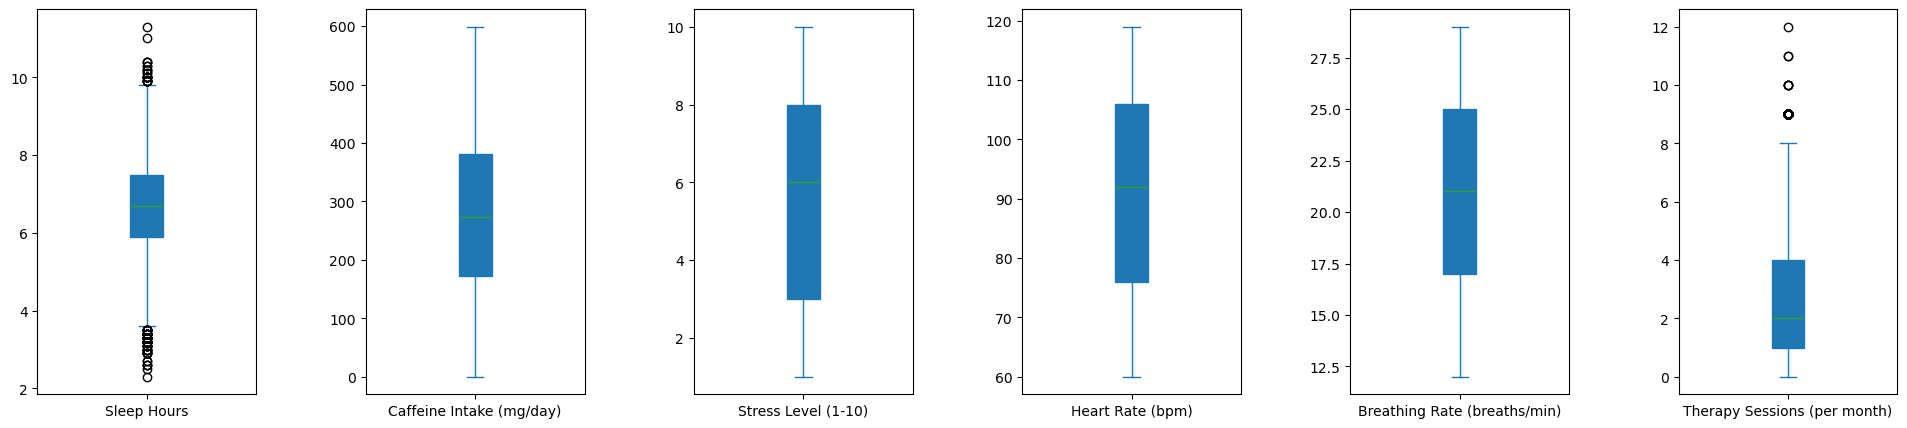

In [15]:
columns_of_interest = [
    'Sleep Hours',
    'Caffeine Intake (mg/day)',
    'Stress Level (1-10)',
    'Heart Rate (bpm)',
    'Breathing Rate (breaths/min)',
    'Therapy Sessions (per month)']
df[columns_of_interest].plot(
    subplots=True,
    layout=(1, len(columns_of_interest)),
    kind='box',
    figsize=(24, 5),
    patch_artist=True)
plt.subplots_adjust(wspace=0.5) 
plt.show()

In [16]:
correlation_matrix = df1.corr(numeric_only = True, method = 'spearman' ).round(2)
correlation_matrix

Age  Sleep Hours  \
Age                                1.00        -0.18   
Sleep Hours                       -0.18         1.00   
Physical Activity (hrs/week)       0.04         0.16   
Caffeine Intake (mg/day)          -0.04        -0.18   
Alcohol Consumption (drinks/week) -0.02        -0.06   
Smoking                           -0.02        -0.06   
Family History of Anxiety         -0.02        -0.07   
Stress Level (1-10)               -0.04        -0.15   
Heart Rate (bpm)                  -0.03        -0.12   
Breathing Rate (breaths/min)      -0.01        -0.10   
Sweating Level (1-5)              -0.02        -0.10   
Dizziness                         -0.03        -0.08   
Medication                        -0.00        -0.03   
Therapy Sessions (per month)      -0.07        -0.20   
Recent Major Life Event           -0.01        -0.06   
Diet Quality (1-10)                0.05         0.13   
Anxiety Level (1-10)              -0.03        -0.35   

                                   Physical Activity (hrs/week)  \
Age                                                        0.04   
Sleep Hours                                                0.16   
Physical Activity (hrs/week)                               1.00   
Caffeine Intake (mg/day)                                  -0.12   
Alcohol Consumption (drinks/week)                         -0.04   
Smoking                                                   -0.04   
Family History of Anxiety                                 -0.05   
Stress Level (1-10)                                       -0.11   
Heart Rate (bpm)                                          -0.08   
Breathing Rate (breaths/min)                              -0.07   
Sweating Level (1-5)                                      -0.08   
Dizziness                                                 -0.04   
Medication                                                -0.02   
Therapy Sessions (per month)                              -0.16   
Recent Major Life Event                                   -0.03   
Diet Quality (1-10)                                        0.09   
Anxiety Level (1-10)                                      -0.18   

                                   Caffeine Intake (mg/day)  \
Age                                                   -0.04   
Sleep Hours                                           -0.18   
Physical Activity (hrs/week)                          -0.12   
Caffeine Intake (mg/day)                               1.00   
Alcohol Consumption (drinks/week)                      0.04   
Smoking                                                0.03   
Family History of Anxiety                              0.07   
Stress Level (1-10)                                    0.12   
Heart Rate (bpm)                                       0.08   
Breathing Rate (breaths/min)                           0.08   
Sweating Level (1-5)                                   0.07   
Dizziness                                              0.03   
Medication                                             0.02   
Therapy Sessions (per month)                           0.17   
Recent Major Life Event                                0.04   
Diet Quality (1-10)                                   -0.09   
Anxiety Level (1-10)                                   0.28   

                                   Alcohol Consumption (drinks/week)  Smoking  \
Age                                                            -0.02    -0.02   
Sleep Hours                                                    -0.06    -0.06   
Physical Activity (hrs/week)                                   -0.04    -0.04   
Caffeine Intake (mg/day)                                        0.04     0.03   
Alcohol Consumption (drinks/week)                               1.00     0.00   
Smoking                                                         0.00     1.00   
Family History of Anxiety                                       0.02     0.00   
Stress Level (1-10)                  

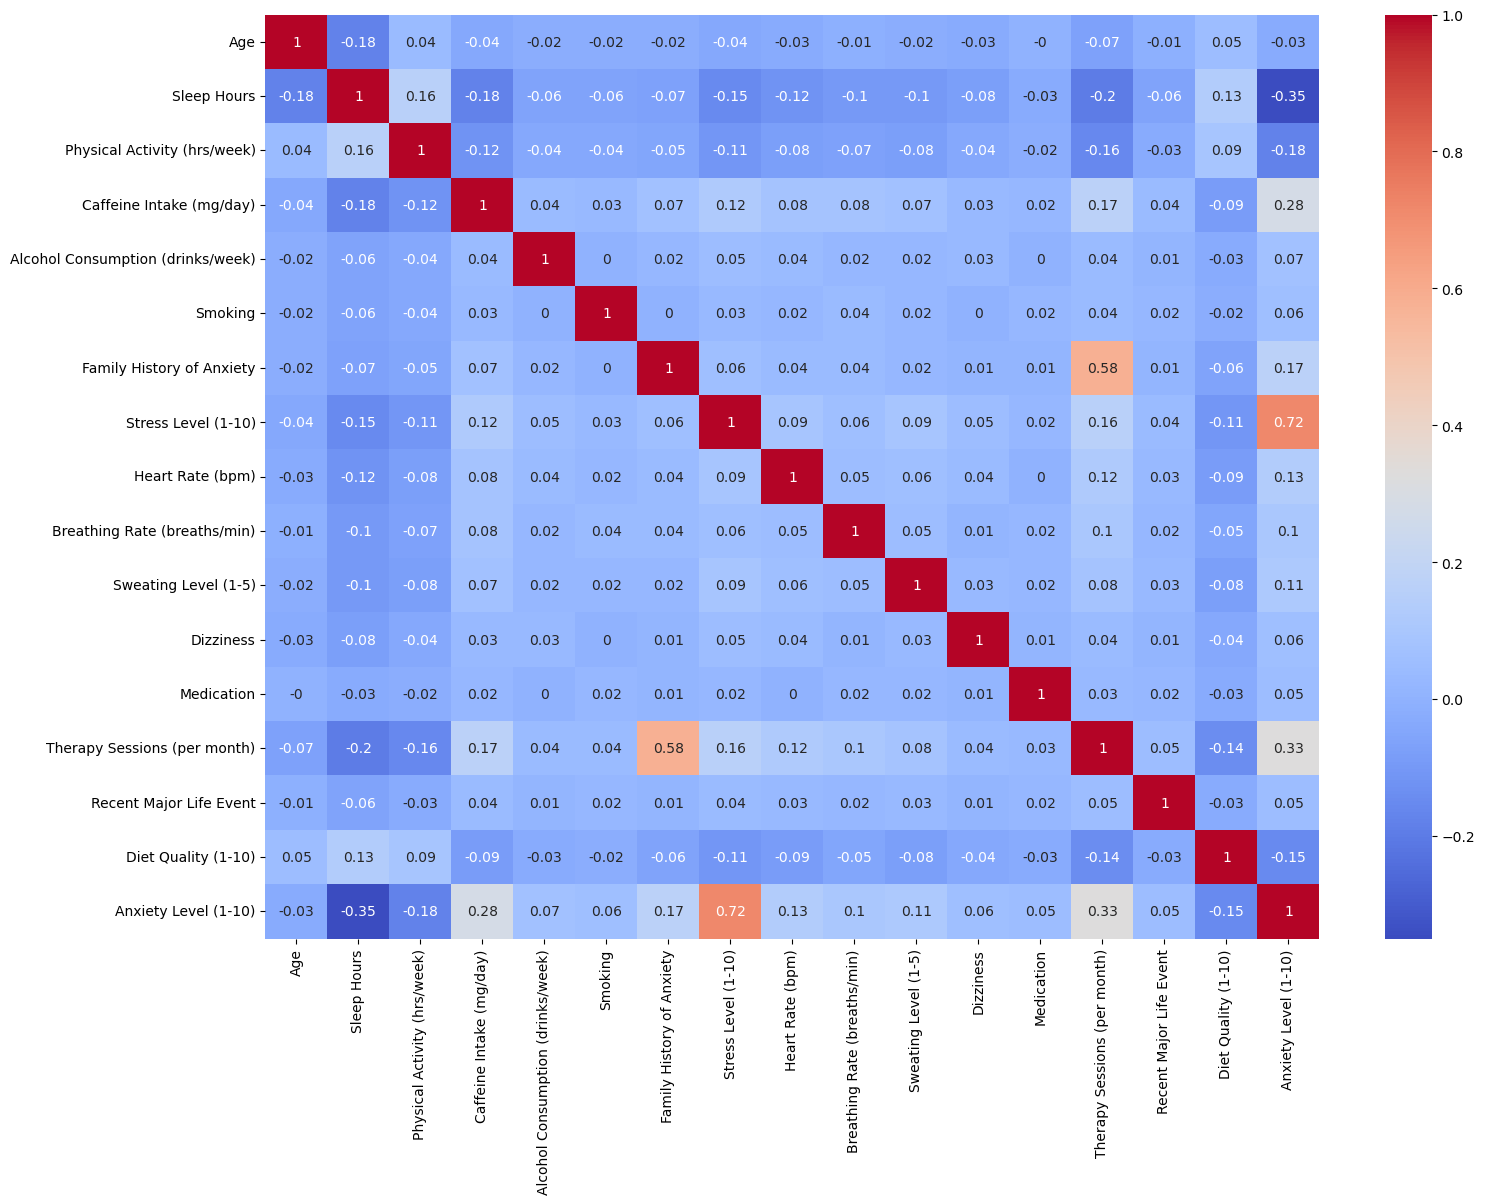

In [17]:
plt.figure(figsize=(17,12))
sns.heatmap(data=correlation_matrix,cmap='coolwarm', annot=True)
plt.show()

<div dir="rtl">
    
# ◊°◊§◊ò◊ï◊û◊ô◊ù ◊©◊û◊¢◊ô◊ì◊ô◊ù ◊¢◊ú ◊ó◊®◊ì◊î
<div dir="rtl">

<div dir="rtl">
◊ë◊î◊™◊ó◊ú◊î ◊®◊¶◊ô◊†◊ï ◊ú◊®◊ê◊ï◊™ ◊ê◊ù ◊ú◊ê◊†◊©◊ô◊ù ◊ó◊®◊ì◊™◊ô◊ù ◊ô◊© ◊°◊û◊§◊ò◊ï◊û◊ô◊ù ◊©◊ï◊†◊ô◊ù ◊î◊û◊¢◊ô◊ì◊ô◊ù ◊¢◊ú ◊õ◊ö.
◊î◊°◊û◊§◊ò◊ï◊ù ◊î◊®◊ê◊©◊ï◊ü ◊©◊†◊í◊¢ ◊ë◊ï ◊î◊ï◊ê ◊î◊ì◊ï◊§◊ß ◊ï◊ú◊õ◊ü ◊î◊™◊ó◊ú◊†◊ï ◊ë◊§◊ô◊¶◊ï◊ú ◊¢◊û◊ï◊ì◊™ ◊î◊ì◊ï◊§◊ß ◊ú3 ◊®◊û◊ï◊™ ◊©◊ï◊†◊ï◊™ ◊ï◊ú◊†◊°◊ï◊™ ◊ú◊®◊ê◊ï◊™ ◊ê◊ù ◊î◊ì◊ï◊§◊ß ◊î◊ï◊ê ◊ê◊õ◊ü ◊°◊û◊ò◊ï◊ù ◊©◊ú ◊ó◊®◊ì◊î.
<ul dir="rtl">

In [20]:
bins = [60, 80, 100, 120, 160]
labels = ['60-80', '80-100', '100-120', '120-160']
df1['Heart Rate (bpm) Group'] = pd.cut(df1['Heart Rate (bpm)'], bins=bins, labels=labels, right=True)
df1['HR_Code'] = df1['Heart Rate (bpm) Group'].astype('category').cat.codes
group_counts = df1['Heart Rate (bpm) Group'].value_counts().sort_index()
group_counts

Heart Rate (bpm) Group
60-80      3354
80-100     3652
100-120    3837
120-160       0
Name: count, dtype: int64

In [21]:
df[['Heart Rate (bpm)', 'Anxiety Level (1-10)']].corr()

Heart Rate (bpm)  Anxiety Level (1-10)
Heart Rate (bpm)                1.0000                0.1889
Anxiety Level (1-10)            0.1889                1.0000

In [22]:
df.groupby( 'Anxiety Level (1-10)')['Heart Rate (bpm)'].mean()

Anxiety Level (1-10)
1.0      89.358999
2.0      89.257403
3.0      89.838803
4.0      89.925911
5.0      88.868631
6.0      89.889610
7.0      87.471545
8.0     104.677686
9.0     104.410334
10.0    104.801242
Name: Heart Rate (bpm), dtype: float64

<ul dir="rtl">
◊ú◊ê◊ó◊® ◊©◊¢◊©◊ô◊†◊ï ◊û◊û◊ï◊¶◊¢ ◊ì◊ï◊§◊ß ◊ë◊õ◊ú ◊®◊û◊™ ◊ó◊®◊ì◊î ◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊ë◊ê◊ï◊§◊ü ◊õ◊ú◊ú◊ô ◊©◊õ◊©◊ê◊® ◊®◊û◊™ ◊î◊ó◊®◊ì◊î ◊í◊ë◊ï◊î ◊ô◊ï◊™◊® ◊õ◊ö ◊û◊û◊ï◊¶◊¢ ◊î◊ì◊ï◊§◊ß ◊í◊ë◊ï◊î ◊ô◊ï◊™◊®.
<ul>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\3260692506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anxiety Group', y='Heart Rate (bpm)', palette='coolwarm', order=order)


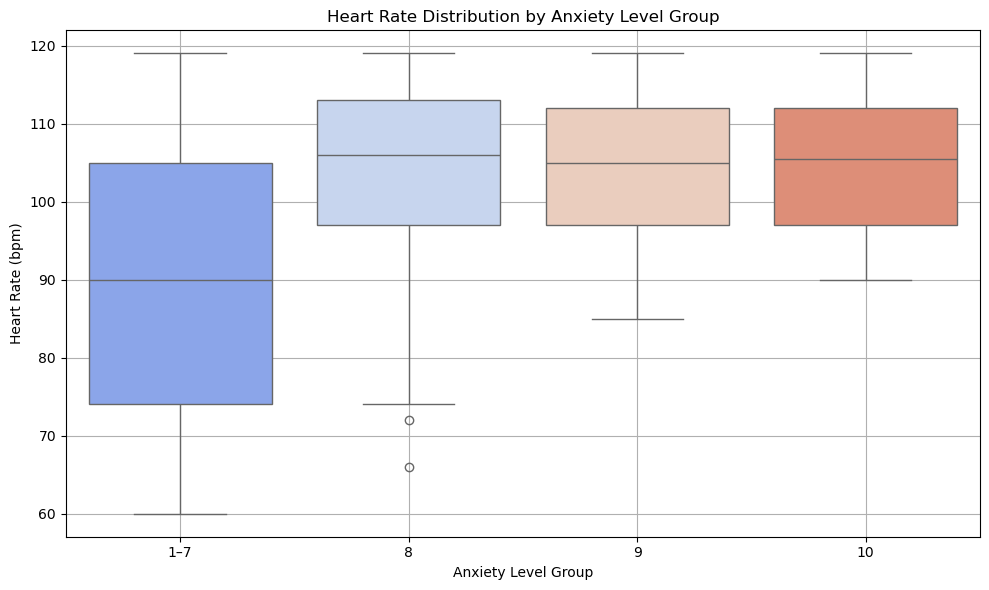

In [24]:
def group_anxiety(x):
    return '1‚Äì7' if x <= 7 else str(int(x))
df['Anxiety Group'] = df['Anxiety Level (1-10)'].apply(group_anxiety)
order = ['1‚Äì7', '8', '9', '10']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Anxiety Group', y='Heart Rate (bpm)', palette='coolwarm', order=order)
plt.title('Heart Rate Distribution by Anxiety Level Group')
plt.xlabel('Anxiety Level Group')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### ◊™◊™ ◊û◊°◊ß◊†◊î ◊®◊ê◊©◊ï◊†◊ô◊™:
<ul dir="rtl">
 ◊ê◊ó◊®◊ô ◊û◊î ◊©◊î◊¶◊í◊†◊ï ◊¢◊ì ◊õ◊î ◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊©◊î◊õ◊ü ◊ë◊ô◊ü ◊ì◊ï◊§◊ß ◊í◊ë◊ï◊î ◊î◊ï◊ê ◊°◊ô◊û◊§◊ò◊ï◊ù ◊ú◊ó◊®◊ì◊î ◊ï◊î◊ù ◊ß◊©◊ï◊®◊ô◊ù ◊ê◊ó◊ì ◊ë◊©◊†◊ô.
<ul>
</div>

<div dir="rtl">
 ◊ú◊ê◊ó◊ì ◊©◊î◊ï◊õ◊ó◊†◊ï ◊ê◊™ ◊î◊°◊ô◊û◊§◊ò◊ï◊ù ◊î◊®◊ê◊©◊ï◊ü ◊©◊ß◊ô◊ô◊ù ◊ß◊©◊® ◊ë◊ô◊†◊ï ◊ú◊ë◊ô◊ü ◊ó◊®◊ì◊î ◊†◊ë◊ì◊ï◊ß ◊ê◊™ ◊î◊°◊ô◊û◊§◊ò◊ï◊ù ◊î◊ë◊ê ◊©◊î◊ï◊ê ◊†◊©◊ô◊û◊î.
    ◊ú◊©◊ù ◊õ◊ö ◊†◊™◊û◊ß◊ì ◊¢◊õ◊©◊ô◊ï ◊ë◊¢◊û◊ï◊ì◊™ ◊î◊†◊©◊ô◊û◊î ◊ï◊†◊§◊ú ◊í◊ù ◊ê◊ï◊™◊î ◊ú◊ß◊ë◊ï◊¶◊ï◊™.
<ul dir="rtl">

In [27]:
df[['Breathing Rate (breaths/min)', 'Anxiety Level (1-10)']].corr()

Breathing Rate (breaths/min)  \
Breathing Rate (breaths/min)                      1.000000   
Anxiety Level (1-10)                              0.157048   

                              Anxiety Level (1-10)  
Breathing Rate (breaths/min)              0.157048  
Anxiety Level (1-10)                      1.000000

In [28]:
def classify_breathing(rate):
    if 12 <= rate <= 20:
        return 'Normal'
    else:
        return 'Abnormal'
df['Breathing Rate Group'] = df['Breathing Rate (breaths/min)'].apply(classify_breathing)
df[['Breathing Rate (breaths/min)', 'Breathing Rate Group']]
df['Breathing_Group'] = pd.cut(
    df['Breathing Rate (breaths/min)'],
    bins=[-float('inf'), 12, 20, float('inf')],
    labels=['Below 12', '12-20 (Normal)', 'Above 20'])

group_counts = df['Breathing_Group'].value_counts().sort_index()
group_counts

Breathing_Group
Below 12           571
12-20 (Normal)    4413
Above 20          6016
Name: count, dtype: int64

In [29]:
# df['Breathing_Group'] = pd.cut(
#     df['Breathing Rate (breaths/min)'],
#     bins=[-float('inf'), 12, 20, float('inf')],
#     labels=['Below 12', '12-20 (Normal)', 'Above 20'])

# group_counts = df['Breathing_Group'].value_counts().sort_index()
# group_counts

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\2849592689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Breathing_Group', y='Anxiety Level (1-10)', palette='coolwarm')


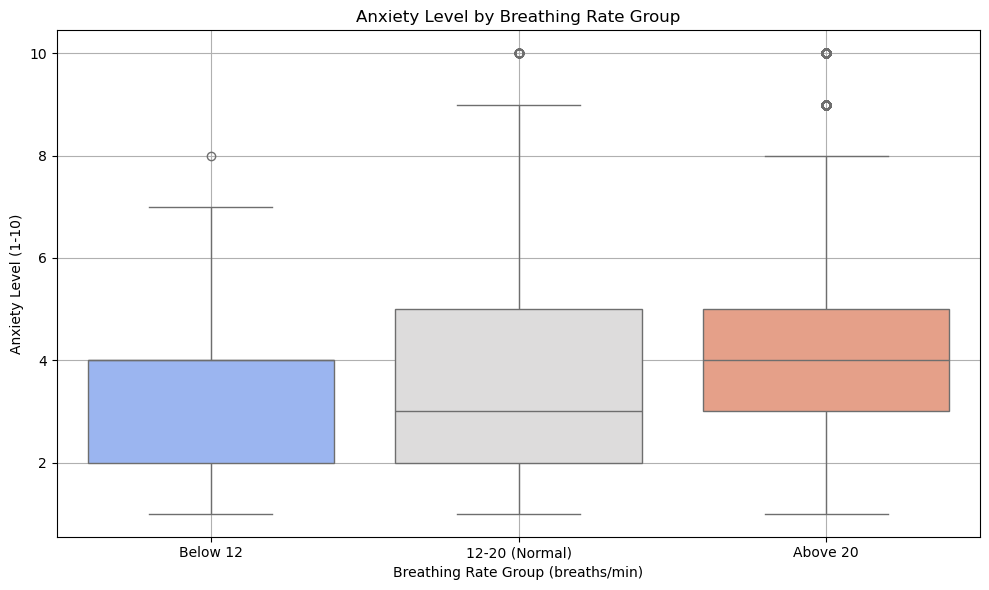

In [30]:
bins = [0, 12, 20, 60]
labels = ['Below 12', '12-20 (Normal)', 'Above 20']
df['Breathing_Group'] = pd.cut(df['Breathing Rate (breaths/min)'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Breathing_Group', y='Anxiety Level (1-10)', palette='coolwarm')
plt.title('Anxiety Level by Breathing Rate Group')
plt.xlabel('Breathing Rate Group (breaths/min)')
plt.ylabel('Anxiety Level (1-10)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ul
◊™◊™ ◊û◊°◊ß◊†◊î ◊©◊†◊ô:
◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊©◊ô◊© ◊í◊ù ◊ß◊©◊® ◊ë◊ô◊ü ◊ß◊¶◊ë ◊†◊©◊ô◊û◊î ◊í◊ë◊ï◊î ◊ú◊®◊û◊™ ◊ó◊®◊ì◊î.

<ul dir="rtl">
◊ú◊ê◊ó◊® ◊ó◊ß◊® ◊ß◊¶◊® ◊©◊ú ◊î◊†◊©◊ô◊û◊î ◊ê◊†◊ï ◊ú◊ê ◊®◊ï◊ê◊ô◊ù ◊û◊©◊î◊ï ◊û◊°◊§◊ô◊ß ◊©◊†◊ï◊õ◊ú ◊ú◊î◊í◊ô◊ì ◊ë◊ï◊ï◊ì◊ê◊ï◊™ ◊©◊†◊©◊ô◊û◊î ◊î◊ô◊ê ◊°◊ô◊û◊§◊ò◊ï◊ù ◊†◊ï◊°◊£. ◊ú◊©◊ù ◊õ◊ö ◊†◊†◊°◊î ◊ú◊©◊ú◊ë ◊ë◊©◊ú◊ë ◊î◊ë◊ê ◊ê◊™ ◊î◊ì◊ï◊§◊ß ◊ô◊ó◊ì ◊¢◊ù ◊î◊†◊©◊ô◊û◊î ◊ï◊†◊®◊ê◊î ◊ê◊ù ◊†◊ï◊õ◊ú ◊ú◊î◊í◊ô◊¢ ◊ú◊û◊°◊ß◊†◊î ◊ó◊ñ◊ß◊î ◊ô◊ï◊™◊®.
<ul>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\3473760726.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


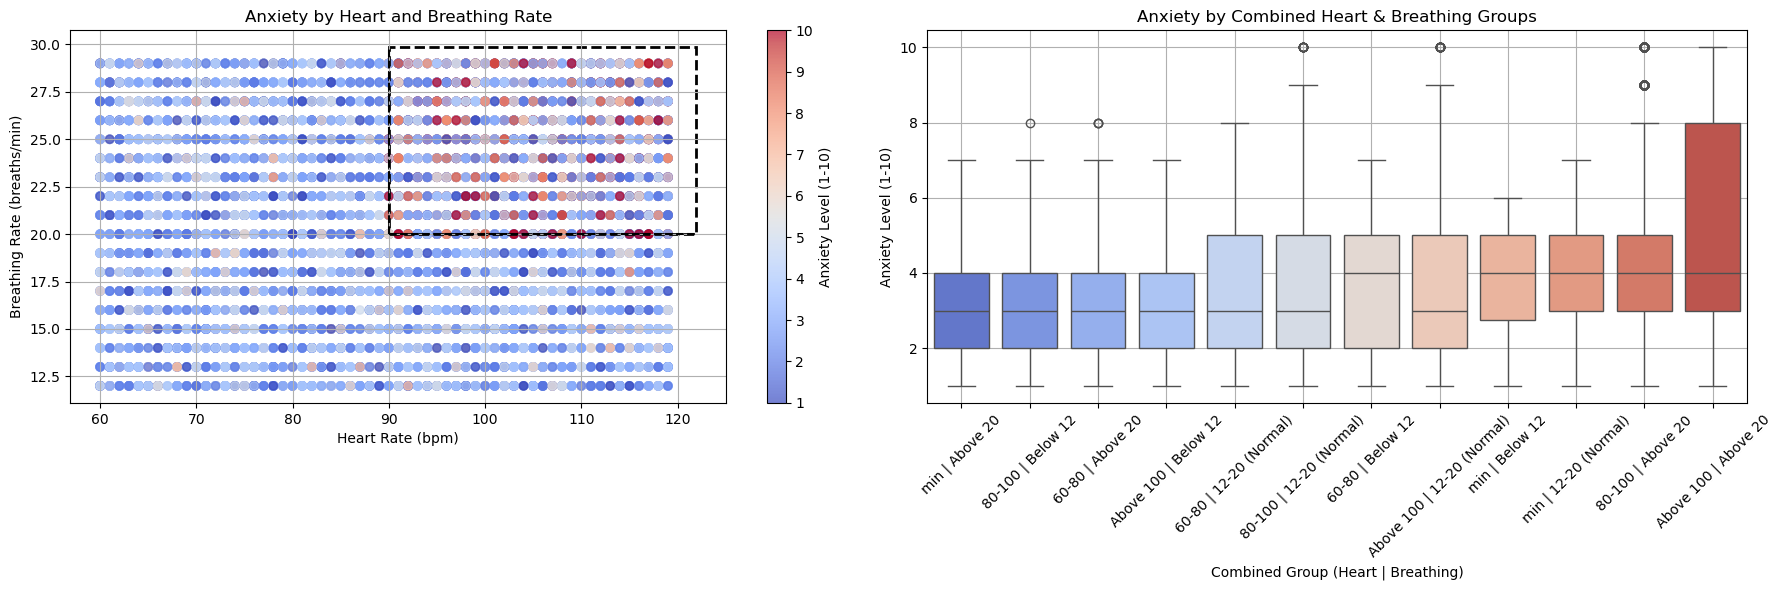

In [33]:
import matplotlib.patches as patches
df['Heart_Group'] = pd.cut(
    df['Heart Rate (bpm)'],
    bins=[-float('inf'), 60, 80, 100, float('inf')],
    labels=['min', '60-80', '80-100', 'Above 100'])
df['Breathing_Group'] = pd.cut(
    df['Breathing Rate (breaths/min)'],
    bins=[-float('inf'), 12, 20, float('inf')],
    labels=['Below 12', '12-20 (Normal)', 'Above 20'])
df['Combined_Group'] = df['Heart_Group'].astype(str) + ' | ' + df['Breathing_Group'].astype(str)
group_means = df.groupby('Combined_Group', observed=False)['Anxiety Level (1-10)'].mean().sort_values()
df['Combined_Group'] = pd.Categorical(
    df['Combined_Group'], 
    categories=group_means.index.tolist(), 
    ordered=True)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
scatter = axes[0].scatter(
    df['Heart Rate (bpm)'],
    df['Breathing Rate (breaths/min)'],
    c=df['Anxiety Level (1-10)'],
    cmap='coolwarm',
    alpha=0.7)
axes[0].set_xlabel('Heart Rate (bpm)')
axes[0].set_ylabel('Breathing Rate (breaths/min)')
axes[0].set_title('Anxiety by Heart and Breathing Rate')
axes[0].grid(True)
cbar = fig.colorbar(scatter, ax=axes[0])
cbar.set_label('Anxiety Level (1-10)')
x_min, x_max = axes[0].get_xlim()
y_min, y_max = axes[0].get_ylim()
axes[0].plot([90, 90], [20, y_max], color='black', linestyle='--', linewidth=1.5)
axes[0].plot([90, x_max], [20, 20], color='black', linestyle='--', linewidth=1.5)
highlight = patches.Rectangle(
    (90, 20),                  
    width=x_max - 90,           
    height=y_max - 20,         
    linewidth=2,
    edgecolor='black',
    facecolor='none',
    linestyle='--')
axes[0].add_patch(highlight)
sns.boxplot(
    data=df,
    x='Combined_Group',
    y='Anxiety Level (1-10)',
    palette='coolwarm',
    ax=axes[1])
axes[1].set_title('Anxiety by Combined Heart & Breathing Groups')
axes[1].set_xlabel('Combined Group (Heart | Breathing)')
axes[1].set_ylabel('Anxiety Level (1-10)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### **◊™◊™÷æ◊û◊°◊ß◊†◊î ◊†◊ï◊°◊£:**
<ul dir="rtl">
◊ê◊ù ◊†◊ê◊ó◊ì ◊ê◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊©◊ú ◊î◊ì◊ï◊§◊ß ◊ï◊î◊†◊©◊ô◊û◊î ◊ë◊ô◊ó◊° ◊ú◊ó◊®◊ì◊î ◊†◊®◊ê◊î ◊©◊õ◊ê◊©◊® ◊ô◊© ◊ì◊ï◊§◊ß ◊ï◊†◊©◊ô◊û◊î ◊û◊ï◊ê◊¶◊ô◊ù,
◊î◊ó◊®◊ì◊î ◊í◊ë◊ï◊î◊î ◊ë◊î◊™◊ê◊û◊î. ◊ê◊ë◊ú ◊õ◊ê◊©◊® ◊®◊ß ◊ê◊ó◊ì ◊û◊î◊ù ◊í◊ë◊ï◊î ◊ú◊ê ◊ë◊î◊õ◊®◊ó ◊ô◊© ◊ó◊®◊ì◊î ◊ë◊®◊û◊î ◊í◊ë◊ï◊î◊î.
<ul>
</div>

<ul dir="rtl">
◊ú◊ê◊ó◊® ◊©◊î◊®◊ê◊†◊ï ◊©◊ô◊© ◊ß◊©◊® ◊ë◊ô◊ü ◊©◊™◊ô ◊î◊°◊ô◊û◊§◊ò◊ï◊ù ◊î◊®◊ê◊©◊ï◊†◊ô◊ù ◊ú◊ë◊ô◊ü ◊®◊û◊™ ◊ó◊®◊ì◊î ◊†◊®◊¶◊î ◊ú◊ë◊ì◊ï◊ß ◊î◊ê◊ù ◊í◊ù ◊®◊û◊™ ◊ñ◊ô◊¢◊î ◊û◊¢◊ô◊ì◊î ◊¢◊ú ◊®◊û◊™ ◊ó◊®◊ì◊î ◊ï◊ê◊§◊©◊® ◊ú◊î◊¶◊ô◊í ◊ê◊ï◊™◊ï ◊õ◊°◊ô◊û◊§◊ò◊ï◊ù ◊†◊ï◊°◊£ ◊ú◊ó◊®◊ì◊î.
<ul>

In [36]:
group_count = df['Sweating Level (1-5)'].value_counts().sort_index()
group_count

Sweating Level (1-5)
1    1978
2    2092
3    2323
4    2279
5    2328
Name: count, dtype: int64

In [37]:
df[['Sweating Level (1-5)', 'Anxiety Level (1-10)']].corr()

Sweating Level (1-5)  Anxiety Level (1-10)
Sweating Level (1-5)              1.000000              0.160074
Anxiety Level (1-10)              0.160074              1.000000

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\3657488345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sweating Level (1-5)', y='Anxiety Level (1-10)', palette='coolwarm')


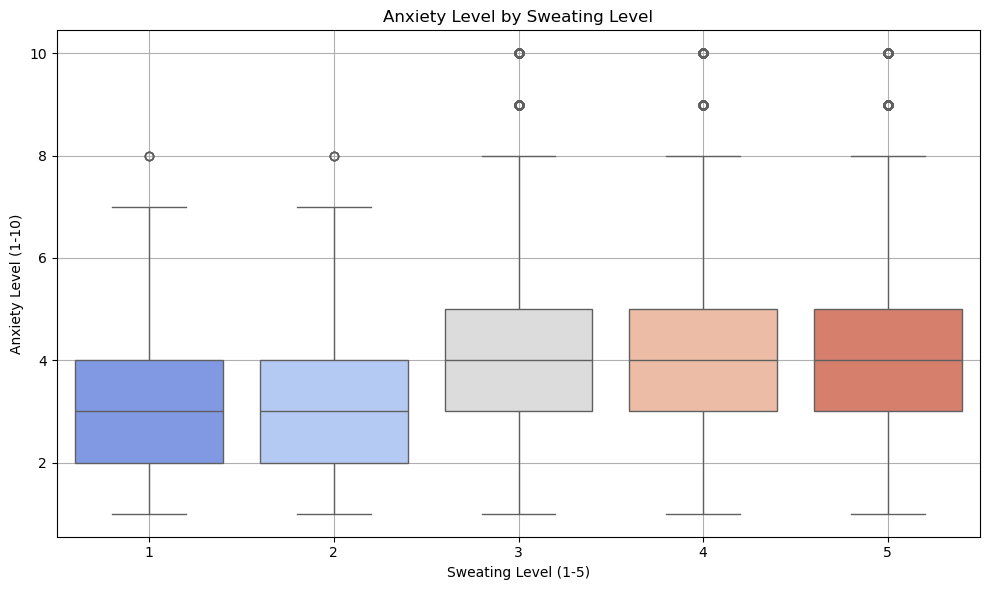

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sweating Level (1-5)', y='Anxiety Level (1-10)', palette='coolwarm')
plt.title('Anxiety Level by Sweating Level')
plt.xlabel('Sweating Level (1-5)')
plt.ylabel('Anxiety Level (1-10)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### **◊™◊™÷æ◊û◊°◊ß◊†◊î ◊†◊ï◊°◊§◊™:**
<ul dir="rtl">
◊ê◊†◊ï ◊®◊ï◊ê◊ô◊ù ◊©◊®◊û◊ï◊™ ◊©◊ï◊†◊ï◊™ ◊©◊ú ◊ñ◊ô◊¢◊î ◊õ◊ü ◊ô◊õ◊ï◊ú◊ï◊™ ◊ú◊î◊ô◊ï◊™ ◊°◊ô◊û◊§◊ò◊ï◊ù ◊ú◊ó◊®◊ì◊î ◊ê◊ö ◊†◊®◊¶◊î ◊ú◊ë◊ì◊ï◊ß ◊ñ◊ê◊™ ◊ë◊¶◊ï◊®◊î ◊ô◊ï◊™◊® ◊ó◊ñ◊ß◊î ◊©◊†◊ï◊õ◊ú ◊ú◊î◊í◊ô◊¢ ◊©◊î◊ô◊ê ◊°◊ô◊û◊§◊ò◊ï◊ù ◊ë◊¶◊ï◊®◊î ◊û◊ï◊ó◊ú◊ò◊™.
<div dir="rtl">
  ◊ú◊©◊ù ◊õ◊ö ◊†◊ô◊ß◊ó ◊ê◊™ ◊©◊ú◊ï◊©◊™ ◊î◊°◊ô◊û◊§◊ò◊ï◊ù ◊ï◊†◊®◊¶◊î ◊ú◊ë◊ì◊ï◊ß ◊î◊ê◊ù ◊ô◊© ◊ß◊©◊® ◊ë◊õ◊ï◊ú◊ù ◊ï◊î◊ê◊ù ◊ê◊ì◊ù ◊©◊ô◊© ◊ú◊ï ◊ê◊™ ◊©◊ú◊ï◊©◊™◊ù ◊†◊ï◊õ◊ú ◊ú◊î◊í◊ô◊ì ◊ë◊ê◊ï◊§◊ü ◊ó◊ì ◊û◊©◊û◊¢◊ô ◊©◊ô◊© ◊ú◊ï ◊ó◊®◊ì◊î.
</div>

<div dir="rtl">
 ◊ú◊©◊ù ◊õ◊ö ...
<ul dir="rtl">

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\2629637033.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


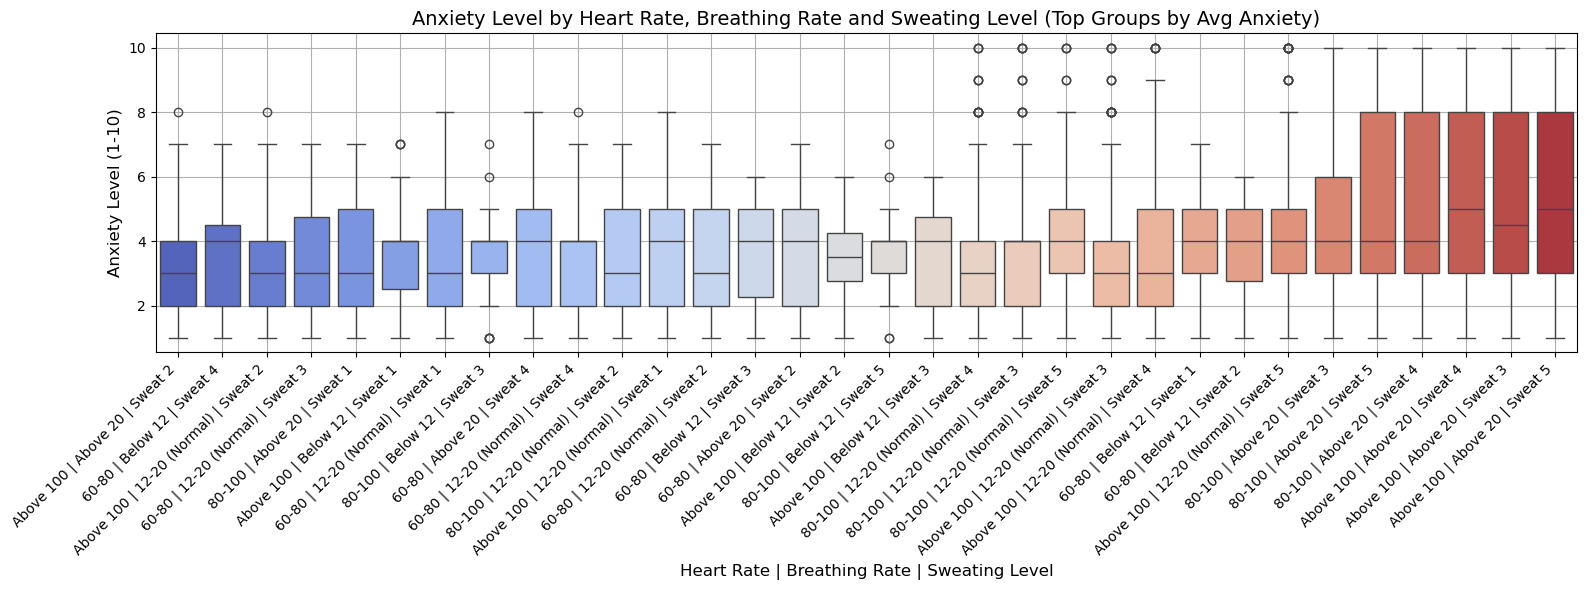

In [41]:
df['HR_Group'] = pd.cut(
    df['Heart Rate (bpm)'],
    bins=[-float('inf'), 60, 80, 100, float('inf')],
    labels=['min', '60-80', '80-100', 'Above 100'])
df['Breathing_Group'] = pd.cut(
    df['Breathing Rate (breaths/min)'],
    bins=[-float('inf'), 12, 20, float('inf')],
    labels=['Below 12', '12-20 (Normal)', 'Above 20'])
df_filtered = df.dropna(subset=['HR_Group', 'Breathing_Group', 'Sweating Level (1-5)'])
df_filtered = df_filtered[df_filtered['HR_Group'] != 'min']
df_filtered['Combined_3'] = (
    df_filtered['HR_Group'].astype(str) + ' | ' +
    df_filtered['Breathing_Group'].astype(str) + ' | Sweat ' +
    df_filtered['Sweating Level (1-5)'].astype(str))
group_means = df_filtered.groupby('Combined_3')['Anxiety Level (1-10)'].mean().sort_values()
filtered_categories = group_means.index[13:]  
df_filtered = df_filtered[df_filtered['Combined_3'].isin(filtered_categories)]
df_filtered['Combined_3'] = pd.Categorical(
    df_filtered['Combined_3'],
    categories=filtered_categories,
    ordered=True)
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=df_filtered,
    x='Combined_3',
    y='Anxiety Level (1-10)',
    palette='coolwarm')
plt.title('Anxiety Level by Heart Rate, Breathing Rate and Sweating Level (Top Groups by Avg Anxiety)', fontsize=14)
plt.xlabel('Heart Rate | Breathing Rate | Sweating Level', fontsize=12)
plt.ylabel('Anxiety Level (1-10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### **◊û◊°◊ß◊†◊î:**
 <li>◊®◊ß ◊õ◊ê◊©◊® ◊ú◊ê◊ì◊ù ◊ô◊© ◊ê◊™ ◊©◊ú◊ï◊©◊™ ◊î◊°◊ô◊û◊§◊ò◊ï◊û◊ô◊ù ◊©◊¶◊ô◊ô◊†◊ï ◊†◊ï◊õ◊ú ◊ú◊ß◊ë◊ï◊¢ ◊©◊î◊ï◊ê ◊ó◊®◊ì.</li>

<h3 dir="rtl">◊î◊®◊ó◊ë◊î:</h3>
<ul dir="rtl">
  <li>◊õ◊ê◊©◊® ◊ê◊ì◊ù ◊°◊ï◊ë◊ú ◊ë◊ï÷æ◊ñ◊û◊†◊ô◊™ ◊û◊î◊ñ◊¢◊™ ◊ô◊™◊®, ◊ì◊ï◊§◊ß ◊í◊ë◊ï◊î ◊ï◊†◊©◊ô◊û◊ï◊™ ◊û◊î◊ô◊®◊ï◊™ ◊†◊ô◊™◊ü ◊ú◊ß◊©◊® ◊ñ◊ê◊™ ◊ë◊ê◊ï◊§◊ü ◊û◊ï◊ë◊î◊ß ◊ú◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊í◊ë◊ï◊î◊ï◊™.</li>
  <li>◊õ◊ê◊©◊® ◊û◊ï◊§◊ô◊¢ ◊®◊ß ◊ê◊ó◊ì ◊û◊î◊°◊ô◊û◊§◊ò◊ï◊û◊ô◊ù (◊ú◊û◊©◊ú ◊ì◊ï◊§◊ß ◊í◊ë◊ï◊î ◊ë◊ú◊ë◊ì) ◊ú◊ê ◊†◊ô◊™◊ü ◊ú◊ß◊ë◊ï◊¢ ◊ë◊ï◊ï◊ì◊ê◊ï◊™ ◊©◊ñ◊î ◊†◊ï◊ë◊¢ ◊û◊ó◊®◊ì◊î, ◊û◊ê◊ó◊® ◊ï◊î◊°◊ô◊û◊§◊ò◊ï◊ù ◊¢◊©◊ï◊ô ◊ú◊†◊ë◊ï◊¢ ◊í◊ù ◊û◊°◊ô◊ë◊ï◊™ ◊ê◊ó◊®◊ï◊™ (◊õ◊û◊ï ◊§◊¢◊ô◊ú◊ï◊™ ◊í◊ï◊§◊†◊ô◊™, ◊û◊ó◊ú◊î ◊§◊ô◊ñ◊ô◊™ ◊ï◊õ◊ï').</li>
</ul>

</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

#  ◊î◊ß◊©◊® ◊ë◊ô◊ü ◊¶◊®◊ô◊õ◊™ ◊ß◊§◊ê◊ô◊ü, ◊©◊¢◊ï◊™ ◊©◊ô◊†◊î, ◊ï◊ó◊®◊ì◊î

</div>

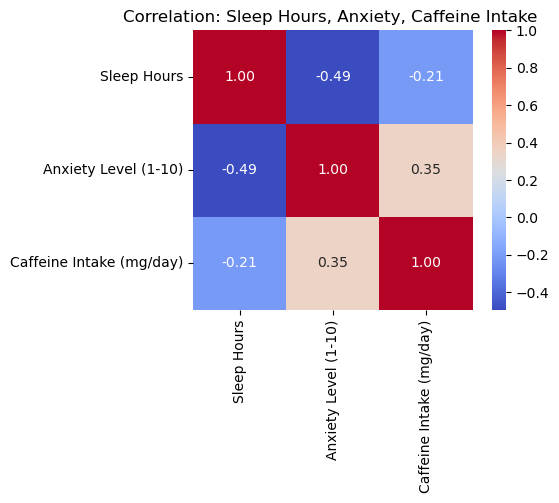

In [44]:
binary_mappings = {"Yes": 1, "No": 0}
binary_columns = [
    "Smoking", "Family History of Anxiety", "Dizziness",
    "Medication", "Recent Major Life Event"]
for col in binary_columns:
    df[col] = df[col].map(binary_mappings)
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()
selected_cols = ["Sleep Hours", "Anxiety Level (1-10)", "Caffeine Intake (mg/day)"]
correlation_df = numeric_df[selected_cols]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation: Sleep Hours, Anxiety, Caffeine Intake ")
plt.tight_layout()
plt.show()

<div dir="rtl">
 ◊î◊í◊®◊£ ◊î◊ë◊ê ◊û◊¶◊ô◊í ◊ê◊™ ◊î◊§◊ô◊ñ◊ï◊® ◊©◊ú ◊¶◊®◊ô◊õ◊™ ◊î◊ß◊§◊ê◊ô◊ü ◊î◊ô◊ï◊û◊ô◊™ ◊ë◊ß◊®◊ë ◊î◊û◊©◊™◊™◊§◊ô◊ù, ◊¢◊ù ◊ß◊ï◊ï◊ô◊ù ◊©◊û◊°◊û◊†◊ô◊ù ◊ê◊™ ◊î◊û◊û◊ï◊¶◊¢ ◊î◊¢◊ï◊ú◊û◊ô (200 ◊û"◊í) ◊ï◊î◊®◊£ ◊î◊¢◊ú◊ô◊ï◊ü ◊ú◊¶◊®◊ô◊õ◊î ◊ë◊ò◊ï◊ó◊î (400 ◊û"◊í).
 <div dir="rtl">

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


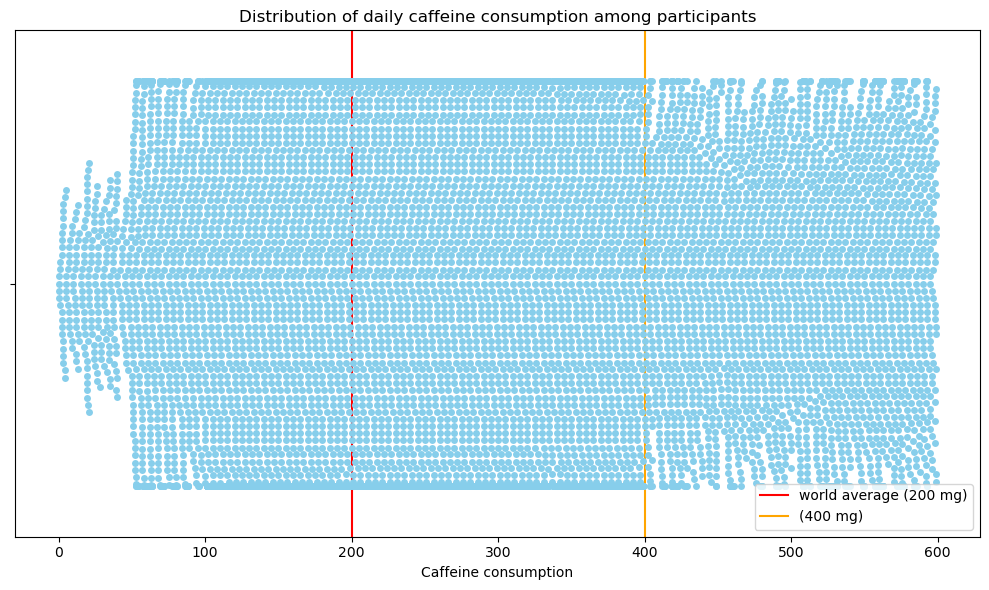

In [46]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x="Caffeine Intake (mg/day)", color="skyblue")
plt.axvline(x=200, color='red', linestyle='-', label='world average (200 mg)')
plt.axvline(x=400, color='orange', linestyle='-', label='(400 mg)')
plt.title("Distribution of daily caffeine consumption among participants")
plt.xlabel("Caffeine consumption")
plt.legend()
plt.tight_layout()
plt.show()

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

## ◊™◊ï◊ë◊†◊î ◊®◊ê◊©◊ï◊†◊î:
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

#### ◊®◊û◊™ ◊ó◊®◊ì◊î ◊ï◊¶◊®◊ô◊õ◊™ ◊ß◊§◊ê◊ô◊ü
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">
<div dir="rtl">
◊õ◊õ◊ú ◊©◊¶◊®◊ô◊õ◊™ ◊î◊ß◊§◊î ◊í◊ë◊ï◊î◊î ◊ô◊ï◊™◊®, ◊®◊û◊™ ◊î◊ó◊®◊ì◊î ◊í◊ë◊ï◊î◊î ◊ô◊ï◊™◊® ◊û◊í◊ô◊ú 18-50 ◊®◊ï◊ê◊ô◊ù ◊û◊ê◊ï◊ì ◊ê◊™ ◊î◊î◊©◊§◊¢◊î, ◊î◊©◊§◊¢◊™ ◊î◊ß◊§◊ê◊ô◊ü ◊¢◊ë◊ï◊® ◊í◊ô◊ú◊ê◊ô 50 ◊ï◊û◊¢◊ú◊î ◊ú◊ê ◊û◊©◊§◊ô◊¢ ◊¢◊ú ◊®◊û◊™ ◊î◊ó◊®◊ì◊î. ( ◊ê◊ï◊ú◊ô ◊ë◊í◊ú◊ú ◊î◊®◊í◊ú ◊î◊ß◊§◊ê◊ô◊ü )\
 ◊¶◊®◊ô◊õ◊™ ◊ß◊§◊ê◊ô◊ü ◊í◊ë◊ï◊î◊î (◊î◊î◊û◊ú◊¶◊î ◊î◊û◊ß◊°◊ô◊û◊ú◊ô◊™ ◊©◊ú ◊û◊©◊®◊ì ◊î◊ë◊®◊ô◊ê◊ï◊™) -400 ◊û"◊í\
 ◊¶◊®◊ô◊õ◊™ ◊ß◊§◊ê◊ô◊ü ◊û◊ê◊ï◊ì ◊í◊ë◊ï◊î◊î -650 ◊û"◊í

</div>

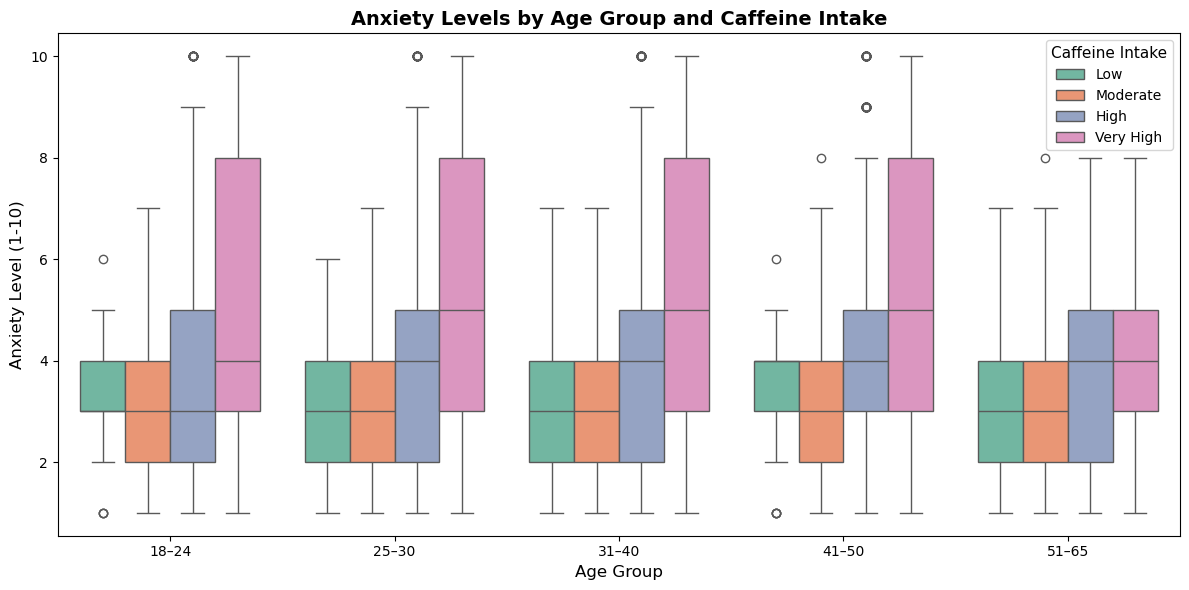

Caffeine Group
High         5172
Moderate     3184
Very High    2377
Low           263
Name: count, dtype: int64

In [50]:
df["age_bins"] = pd.cut(df["Age"], 
                        bins=[17, 24, 30, 40, 50, 65], 
                        labels=["18‚Äì24", "25‚Äì30", "31‚Äì40", "41‚Äì50", "51‚Äì65"])
df["Caffeine Group"] = pd.cut(df["Caffeine Intake (mg/day)"],
                              bins=[0, 50, 200, 400, 650],
                              labels=["Low", "Moderate", "High","Very High"])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, 
            x="age_bins", 
            y="Anxiety Level (1-10)", 
            hue="Caffeine Group", 
            palette="Set2")  # ◊ê◊§◊©◊® ◊í◊ù pastel, Set3, muted
plt.title("Anxiety Levels by Age Group and Caffeine Intake", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Anxiety Level (1-10)", fontsize=12)
plt.legend(title="Caffeine Intake", title_fontsize=11, fontsize=10, loc="upper right")
plt.tight_layout()
plt.show()
df["Caffeine Group"].value_counts()

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

#### ◊®◊û◊™ ◊ó◊®◊ì◊î ◊ï◊©◊ô◊†◊î

</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

 ###### ◊ê◊§◊©◊® ◊ú◊®◊ê◊ï◊™ ◊ë◊í◊®◊£ ◊©◊õ◊õ◊ú ◊©◊ô◊©◊†◊ô◊ù ◊§◊ó◊ï◊™ ◊õ◊õ◊î ◊®◊û◊™ ◊î◊ó◊®◊ì◊î ◊¢◊ï◊ú◊î  
</div>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\2836022944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sleep Group", y="Anxiety Level (1-10)", palette="Set2")


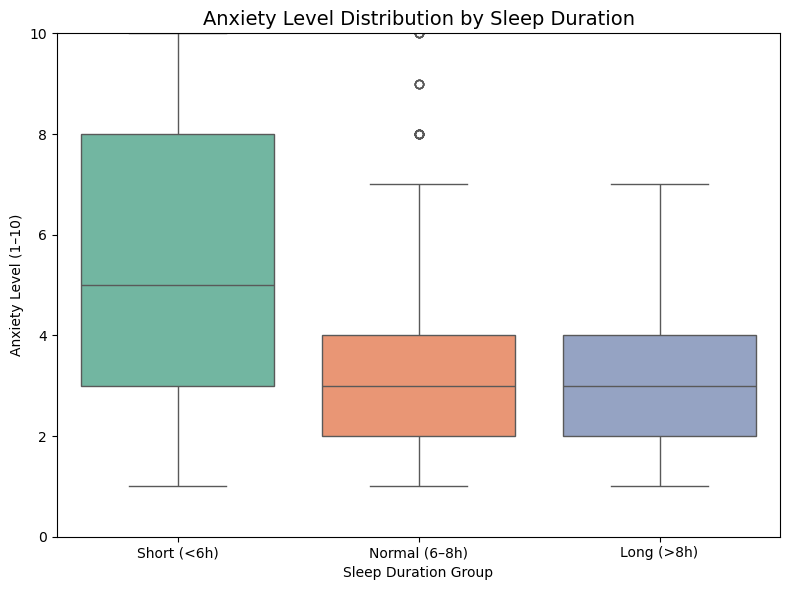

In [53]:
df["Sleep Group"] = pd.cut(
    df["Sleep Hours"],
    bins=[0, 5.9, 8, 24],
    labels=["Short (<6h)", "Normal (6‚Äì8h)", "Long (>8h)"])
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Sleep Group", y="Anxiety Level (1-10)", palette="Set2")
plt.title("Anxiety Level Distribution by Sleep Duration", fontsize=14)
plt.xlabel("Sleep Duration Group")
plt.ylabel("Anxiety Level (1‚Äì10)")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

## ◊™◊ï◊ë◊†◊î ◊©◊†◊ô◊ô◊î:
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

### ◊î◊ß◊©◊® ◊ë◊ô◊ü ◊ß◊§◊ê◊ô◊ü ◊ï◊©◊¢◊ï◊™ ◊©◊ô◊†◊î 
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

 ###### ◊®◊ï◊ê◊ô◊ù ◊ë◊¶◊ï◊®◊î ◊ó◊ì◊î ◊©◊û◊ô ◊©◊ô◊©◊ü ◊§◊ó◊ï◊™ ◊û- 6 ◊©◊¢◊ï◊™ ◊¶◊ï◊®◊ö ◊ô◊ï◊™◊® ◊ß◊§◊ê◊ô◊ü

</div>

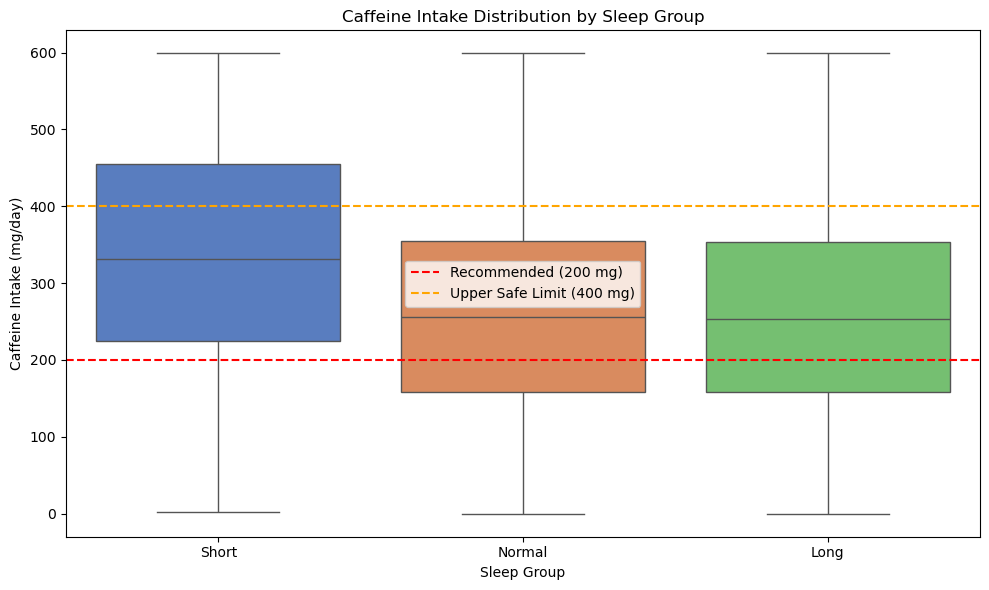

In [57]:
df["Sleep Group"] = pd.cut(
    df["Sleep Hours"],
    bins=[0, 5.9, 8, 24],
    labels=["Short", "Normal", "Long"])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Sleep Group", y="Caffeine Intake (mg/day)", hue="Sleep Group", palette="muted")
plt.axhline(200, color='red', linestyle='--', label="Recommended (200 mg)")
plt.axhline(400, color='orange', linestyle='--', label="Upper Safe Limit (400 mg)")
plt.title("Caffeine Intake Distribution by Sleep Group")
plt.ylabel("Caffeine Intake (mg/day)")
plt.legend()
plt.tight_layout()
plt.show()

<div dir="rtl">
◊®◊ï◊ê◊ô◊ù ◊©◊ë◊ß◊ë◊ï◊¶◊™ ◊î◊©◊ô◊†◊î ◊î◊ß◊¶◊®◊î ◊¶◊®◊ô◊õ◊™ ◊î◊ß◊§◊ê◊ô◊ü ◊ë◊û◊û◊ï◊¶◊¢ ◊î◊ô◊ê ◊û◊¢◊ú ◊î◊¶◊®◊ô◊õ◊î ◊î◊ô◊ï◊û◊ô◊™ ◊î◊û◊û◊ï◊¶◊¢◊™ ◊ï◊î◊ó◊¶◊ô◊ï◊ü ◊î◊¢◊ú◊ô◊ï◊ü ◊¢◊ï◊ë◊® ◊ê◊™ ◊î◊¶◊®◊ô◊õ◊î ◊î◊û◊ß◊°◊ô◊û◊ú◊ô◊™ ◊î◊û◊ï◊û◊ú◊¶◊™ \
◊ß◊ë◊ï◊¶◊ï◊™ ◊©◊ô◊†◊î ◊†◊ï◊®◊û◊ú◊ô◊™ ◊ï◊ê◊®◊ï◊õ◊î- ◊î◊û◊û◊ï◊¶◊¢ ◊î◊ï◊ê ◊û◊¢◊ú 250 ◊û"◊í\
◊†◊ë◊ó◊ü ◊ë◊í◊®◊§◊ô◊ù ◊î◊ë◊ê◊ô◊ù ◊ú◊¢◊ï◊û◊ß ◊ê◊™ ◊î◊ì◊ë◊®◊ô◊ù.
 
<div dir="rtl">
◊ß◊ë◊ï◊¶◊™ ◊©◊ô◊†◊î ◊ß◊¶◊®◊î- ◊§◊ó◊ï◊™ ◊û-6 ◊©◊¢◊ï◊™ \
◊ß◊ë◊ï◊¶◊™ ◊©◊ô◊†◊î ◊†◊ï◊®◊û◊ú◊ô◊™ - ◊ë◊ô◊ü 6-8 ◊©◊¢◊ï◊™ ◊©◊ô◊†◊î \
◊ß◊ë◊ï◊¶◊™ ◊©◊ô◊†◊î ◊ê◊®◊ï◊õ◊î - ◊ô◊ï◊™◊® ◊û-8 ◊©◊¢◊ï◊™ ◊©◊ô◊†◊î
<div dir="rtl">
üî¥ ◊ß◊ï ◊ê◊ì◊ï◊ù ◊ë÷æ200 ◊û"◊í: ◊ñ◊ï ◊î◊¶◊®◊ô◊õ◊î ◊î◊ô◊ï◊û◊ô◊™ ◊î◊û◊û◊ï◊¶◊¢◊™ ◊ë◊¢◊ï◊ú◊ù (◊ú◊§◊ô ◊û◊ó◊ß◊®◊ô◊ù).
<div dir="rtl">
üü† ◊ß◊ï ◊õ◊™◊ï◊ù ◊ë÷æ400 ◊û"◊í: ◊ñ◊ï ◊î◊¶◊®◊ô◊õ◊î ◊î◊û◊ß◊°◊ô◊û◊ú◊ô◊™ ◊î◊û◊ï◊û◊ú◊¶◊™ ◊ú◊û◊ë◊ï◊í◊®◊ô◊ù ◊ú◊§◊ô ◊ê◊®◊í◊ï◊†◊ô ◊ë◊®◊ô◊ê◊ï◊™.
<div dir="rtl">

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

## ◊™◊ï◊ë◊†◊î ◊©◊ú◊ô◊©◊ô◊™:
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

#### ◊î◊©◊ô◊ú◊ï◊ë ◊ë◊ô◊ü ◊ß◊§◊ê◊ô◊ü ◊ï◊©◊¢◊ï◊™ ◊©◊ô◊†◊î ◊ë◊ß◊ë◊ï◊¶◊ï◊™ ◊í◊ô◊ú ◊©◊ï◊†◊ï◊™
</div>

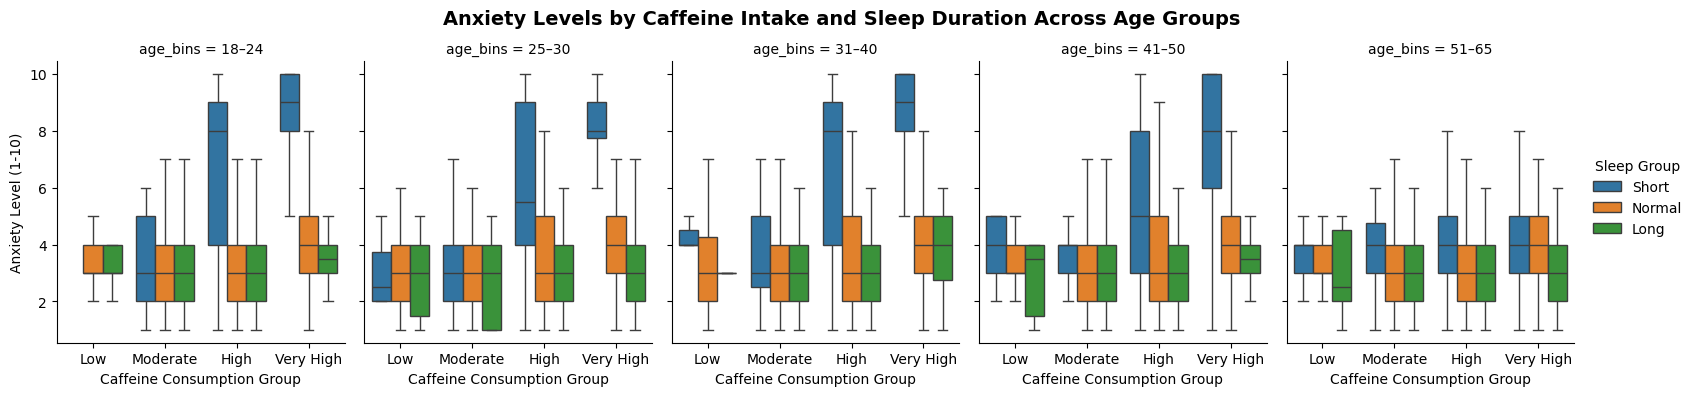

In [61]:
df["Caffeine Group"] = pd.cut(
    df["Caffeine Intake (mg/day)"],
    bins=[0, 50, 200, 400, np.inf],
    labels=["Low", "Moderate", "High", "Very High"])
df["Caffeine Group"] = pd.Categorical(
    df["Caffeine Group"],
    categories=["Low", "Moderate", "High", "Very High"],
    ordered=True)
df["Caffeine Group"] = pd.cut(df["Caffeine Intake (mg/day)"],
                              bins=[0, 50, 200, 450, 650],
                              labels=["Low", "Moderate", "High","Very High"])
df["Sleep Group"] = pd.cut(
    df["Sleep Hours"],
    bins=[0, 5.9, 8, 24],
    labels=["Short", "Normal", "Long"])
sleep_palette = {
    "Short": "#1f77b4",   
    "Normal": "#ff7f0e",  
    "Long": "#2ca02c"}  
g = sns.catplot(
    data=df,
    x="Caffeine Group",
    y="Anxiety Level (1-10)",
    hue="Sleep Group",
    col="age_bins",
    kind="box",
    palette=sleep_palette,
    showfliers=False,   
    sharey=True,        
    height=4,
    aspect=0.8)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Anxiety Levels by Caffeine Intake and Sleep Duration Across Age Groups", fontsize=14, fontweight='bold')
for ax in g.axes.flatten():
    ax.set_xlabel("Caffeine Consumption Group")
    ax.set_ylabel("Anxiety Level (1-10)")


<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

# ◊û◊°◊ß◊†◊î ◊©◊†◊ô◊ô◊î:
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

<div dir="rtl">
 ◊©◊ô◊ú◊ï◊ë ◊©◊ú ◊©◊ô◊†◊î ◊ß◊¶◊®◊î ◊ï◊¶◊®◊ô◊õ◊™ ◊ß◊§◊ê◊ô◊ü ◊í◊ë◊ï◊î◊î ◊ß◊©◊ï◊®
◊ú◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊í◊ë◊ï◊î◊ï◊™ ◊û◊©◊û◊¢◊ï◊™◊ô◊™.
◊ë◊ß◊ë◊ï◊¶◊ï◊™ ◊í◊ô◊ú ◊û◊ë◊ï◊í◊®◊ï◊™ ◊ô◊ï◊™◊® ◊î◊ß◊©◊® ◊î◊ñ◊î ◊†◊ó◊ú◊© ◊ï◊ô◊ô◊™◊õ◊ü ◊©◊ô◊© ◊û◊†◊í◊†◊ï◊†◊ô ◊ï◊ô◊°◊ï◊™ ◊ò◊ï◊ë◊ô◊ù ◊ô◊ï◊™◊® ◊ê◊ï ◊î◊®◊í◊ú◊ô◊ù ◊ô◊¶◊ô◊ë◊ô◊ù ◊ô◊ï◊™◊®.
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

# üìå  ◊û◊ê◊ó◊ï◊®◊ô ◊î◊û◊ô◊ú◊ô◊ù: ◊õ◊ô◊¶◊ì ◊û◊©◊™◊†◊ô◊ù ◊ê◊ô◊©◊ô◊ô◊ù ◊û◊©◊§◊ô◊¢◊ô◊ù ◊¢◊ú ◊î◊¶◊ú◊ó◊™ ◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô?

</div>

<div dir="rtl">
 ◊õ◊ô◊¶◊ì ◊í◊ï◊®◊û◊ô◊ù ◊õ◊û◊ï ◊í◊ô◊ú, ◊™◊ñ◊ï◊†◊î ◊ï◊î◊®◊ß◊¢ ◊î◊û◊©◊§◊ó◊™◊ô ◊û◊¢◊¶◊ë◊ô◊ù ◊ê◊™ ◊î◊ì◊®◊ö ◊©◊ë◊î ◊ê◊†◊ó◊†◊ï ◊ó◊ï◊ï◊ô◊ù ◊ó◊®◊ì◊î ‚Äì ◊ï◊ê◊™ ◊î◊ì◊®◊ö ◊ë◊î ◊ê◊†◊ó◊†◊ï ◊û◊™◊û◊ï◊ì◊ì◊ô◊ù ◊ê◊ô◊™◊î?
</div>

<div dir="rtl">
◊õ◊ô◊¶◊ì ◊í◊ï◊®◊û◊ô◊ù ◊ó◊ô◊¶◊ï◊†◊ô◊ô◊ù ◊õ◊û◊ï ◊í◊ô◊ú, ◊ê◊ô◊õ◊ï◊™ ◊™◊ñ◊ï◊†◊î ◊ï◊î◊ô◊°◊ò◊ï◊®◊ô◊î ◊û◊©◊§◊ó◊™◊ô◊™ ◊©◊ú ◊ó◊®◊ì◊î ◊û◊©◊§◊ô◊¢◊ô◊ù ◊¢◊ú ◊®◊û◊ï◊™ ◊î◊ó◊®◊ì◊î ◊ë◊ß◊®◊ë ◊ê◊†◊©◊ô◊ù ◊î◊§◊ï◊†◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊ë◊ú◊ë◊ì?
</div>

<div dir="rtl">

### ◊†◊ë◊ó◊ü ◊™◊ó◊ô◊ú◊î, ◊õ◊û◊î ◊ê◊†◊©◊ô◊ù ◊û◊î◊û◊ì◊í◊ù ◊§◊ï◊†◊ô◊ù ◊ú◊§◊°◊ô◊õ◊ï◊ú◊ï◊í?

</div>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

df = pd.read_csv("enhanced_anxiety.csv")

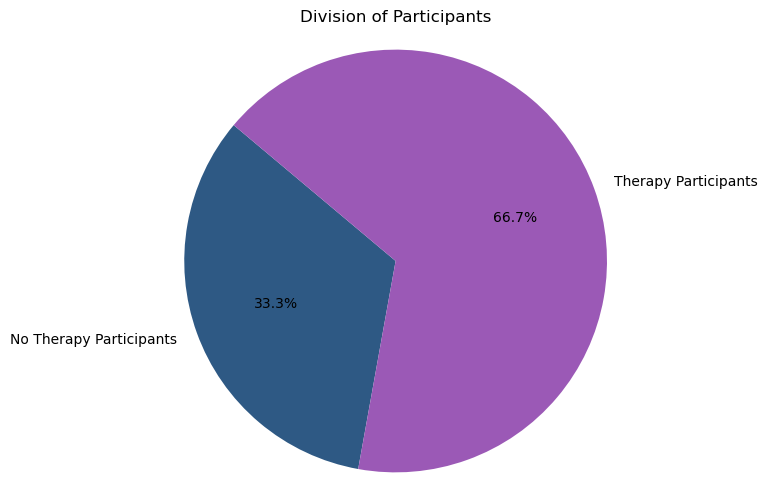

In [68]:
therapy_only_participants = df[
    (df['Medication'] == 'No') &
    (df['Therapy Sessions (per month)'] > 0) &
    (df['Therapy Sessions (per month)'] < 10)
].copy()

no_therapy_participants = df[df['Therapy Sessions (per month)'] == 0].copy()

labels = ['No Therapy Participants', 'Therapy Participants']
sizes = [len(no_therapy_participants), len(therapy_only_participants)]

colors = ['#2E5984', '#9B59B6']  

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Division of Participants')
plt.axis('equal')
plt.show()


<div dir="rtl">
◊û◊î◊†◊™◊ï◊†◊ô◊ù ◊¢◊ï◊ú◊î ◊õ◊ô ◊õ-66%, ◊©◊†◊ô ◊©◊ú◊ô◊© ◊û◊î◊†◊ë◊ì◊ß◊ô◊ù ◊§◊ï◊†◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊û◊™◊ï◊ö ◊î◊û◊ì◊í◊ù.

</div>



<div dir="rtl">
◊õ◊¢◊™ ◊†◊ë◊ó◊ü ◊ê◊™ ◊î◊ß◊©◊® ◊ë◊ô◊ü ◊®◊û◊™ ◊î◊ó◊®◊ì◊î ◊ú◊ê◊ï◊™◊ù ◊ê◊†◊©◊ô◊ù ◊ê◊©◊® ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ê◊¶◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í
</div>


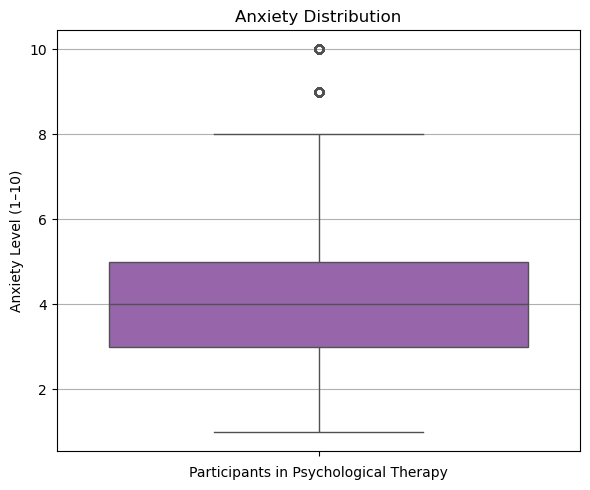

In [71]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=therapy_only_participants,
    y="Anxiety Level (1-10)",
    color="#9B59B6")
plt.xlabel("Participants in Psychological Therapy")
plt.ylabel("Anxiety Level (1‚Äì10)")
plt.title("Anxiety Distribution", fontsize=12)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

<div dir="rtl">
◊®◊û◊ï◊™ ◊î◊ó◊®◊ì◊î ◊ë◊ß◊®◊ë ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊î◊§◊ï◊†◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊û◊¶◊ô◊í◊ï◊™ ◊§◊ô◊ñ◊ï◊® ◊®◊ó◊ë ◊ï◊†◊ï◊õ◊ó◊ï◊™ ◊¢◊®◊õ◊ô◊ù ◊ß◊ô◊¶◊ï◊†◊ô◊ô◊ù, ◊õ◊§◊ô ◊©◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊û◊î◊ê◊ï◊®◊ö ◊©◊ú ◊î◊™◊ô◊ë◊î ◊ï◊î◊ß◊ï◊ï◊ô◊ù ◊ï◊û◊î◊†◊ß◊ï◊ì◊ï◊™ ◊î◊ó◊®◊ô◊í◊ï◊™ ◊ë◊í◊®◊£ ‚Äî ◊û◊î ◊©◊û◊¢◊ô◊ì ◊¢◊ú ◊©◊ï◊†◊ï◊™ ◊í◊ë◊ï◊î◊î ◊ë◊™◊í◊ï◊ë◊™ ◊î◊û◊ò◊ï◊§◊ú◊ô◊ù.
</div>




<div dir="rtl">
◊î◊©◊ï◊†◊ï◊™ ◊ë◊™◊í◊ï◊ë◊™ ◊î◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊¢◊©◊ï◊ô◊î ◊ú◊î◊ô◊ï◊™ ◊ß◊©◊ï◊®◊î ◊í◊ù ◊ú◊™◊ì◊ô◊®◊ï◊™ ◊î◊û◊§◊í◊©◊ô◊ù.
◊†◊ë◊ì◊ï◊ß ◊ñ◊ê◊™ ◊õ◊ê◊ü 
</div>


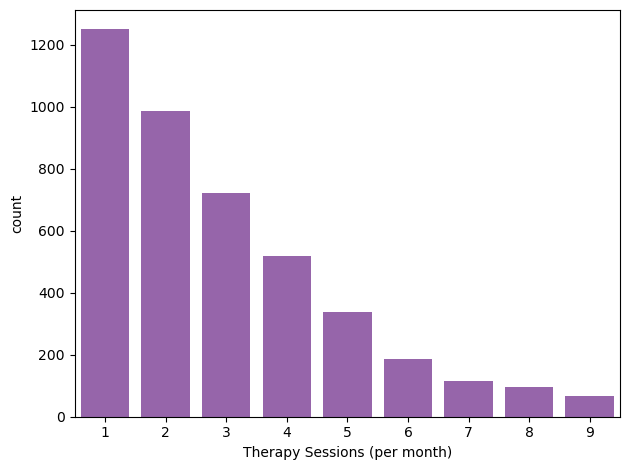

In [74]:
sns.countplot(data=therapy_only_participants,
              x='Therapy Sessions (per month)', color='#9B59B6')
plt.tight_layout()
plt.show()

<div dir="rtl">
◊î◊î◊™◊§◊ú◊í◊ï◊™ ◊û◊¶◊ë◊ô◊¢◊î ◊¢◊ú ◊õ◊ö ◊©◊®◊ï◊ë ◊î◊û◊ò◊ï◊§◊ú◊ô◊ù ◊§◊ï◊†◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊ë◊™◊ì◊ô◊®◊ï◊™ ◊©◊ú ◊ê◊ó◊™ ◊¢◊ì ◊ó◊û◊© ◊§◊í◊ô◊©◊ï◊™ ◊ë◊ó◊ï◊ì◊©, ◊ë◊¢◊ï◊ì ◊©◊ß◊ë◊ï◊¶◊ï◊™ ◊†◊ï◊°◊§◊ï◊™ ◊ë◊ï◊ó◊®◊ï◊™ ◊ë◊™◊ì◊ô◊®◊ï◊ô◊ï◊™ ◊í◊ë◊ï◊î◊ï◊™ ◊ô◊ï◊™◊® ‚Äì ◊û◊î ◊©◊û◊¢◊ô◊ì ◊¢◊ú
◊©◊ï◊†◊ï◊™ ◊ë◊¢◊ï◊û◊ß ◊ï◊ë◊ê◊ô◊†◊ò◊†◊°◊ô◊ë◊ô◊ï◊™ ◊©◊ú ◊î◊™◊î◊ú◊ô◊ö ◊î◊ò◊ô◊§◊ï◊ú◊ô
</div>


<div dir="rtl">
◊ï◊õ◊¢◊™ ◊†◊ë◊ó◊ü ◊õ◊ô◊¶◊ì ◊ë◊ê◊ï◊™ ◊ú◊ô◊ì◊ô ◊ë◊ô◊ò◊ï◊ô ◊®◊û◊ï◊™ ◊î◊ó◊®◊ì◊î ◊ë◊ß◊®◊ë ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊©◊û◊í◊ô◊¢◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊ë◊ß◊¶◊ë◊ô◊ù ◊©◊ï◊†◊ô◊ù
</div>

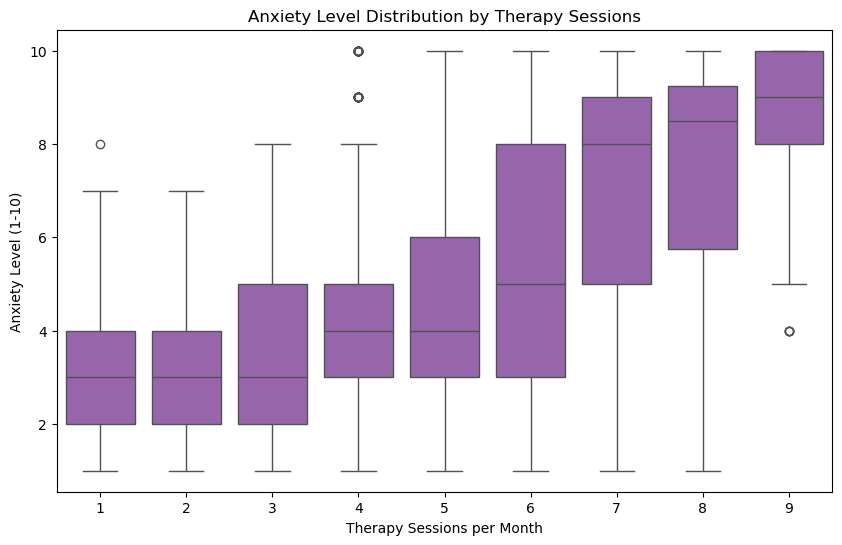

In [77]:
therapy_no_med = df[(df['Therapy Sessions (per month)'] > 0) & (df['Medication'] == 'No')]
therapy_no_med = therapy_no_med[therapy_no_med['Therapy Sessions (per month)'] < 10]
therapy_no_med = therapy_no_med.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(data=therapy_no_med,
            x='Therapy Sessions (per month)',
            y='Anxiety Level (1-10)',
            color='#9B59B6')
plt.title('Anxiety Level Distribution by Therapy Sessions')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Anxiety Level (1-10)')
plt.show()

<div dir="rtl">

### ◊™◊ï◊ë◊†◊î ◊®◊ê◊©◊ï◊†◊î:

</div>

<div dir="rtl">
◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊©◊ß◊ô◊ô◊ù ◊ß◊©◊® ◊ë◊ô◊ü ◊®◊û◊™ ◊ó◊®◊ì◊î ◊í◊ë◊ï◊î◊î ◊ú◊ë◊ô◊ü ◊õ◊û◊ï◊™ ◊ò◊ô◊§◊ï◊ú◊ô◊ù ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô◊ô◊ù ◊í◊ë◊ï◊î◊î
</div>


<div dir="rtl">
◊ú◊ê◊ó◊® ◊©◊®◊ê◊ô◊†◊ï ◊õ◊ô ◊ß◊ô◊ô◊û◊™ ◊î◊™◊ê◊û◊î ◊ë◊ô◊ü ◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊í◊ë◊ï◊î◊ï◊™ ◊ú◊ë◊ô◊ü ◊™◊ì◊ô◊®◊ï◊™ ◊í◊ë◊ï◊î◊î ◊©◊ú ◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô, ◊†◊ë◊ß◊© ◊õ◊¢◊™ ◊ú◊ë◊ó◊ï◊ü ◊õ◊ô◊¶◊ì ◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊ó◊ô◊¶◊ï◊†◊ô◊ô◊ù ◊†◊ï◊°◊§◊ô◊ù ◊ë◊ê◊ô◊ù ◊ú◊ô◊ì◊ô ◊ë◊ô◊ò◊ï◊ô ◊ë◊î◊ß◊©◊® ◊©◊ú ◊®◊û◊ï◊™ ◊î◊ó◊®◊ì◊î ◊ë◊ß◊®◊ë ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ê◊ú◊î.
</div>


<div dir="rtl">
    
### ◊õ◊ô◊¶◊ì ◊û◊™◊§◊ú◊í◊ô◊ù ◊î◊í◊ô◊ú◊ê◊ô◊ù ◊ë◊ß◊ë◊ï◊¶◊î ◊ñ◊ï?
    
</div>


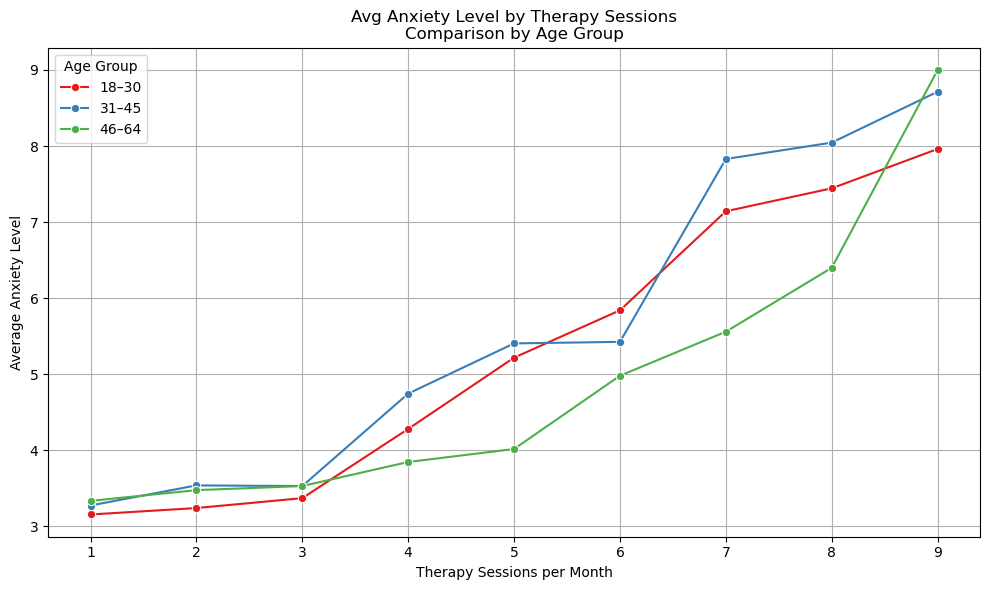

In [81]:
age_bins = [17, 30, 45, 65]
age_labels = ['18‚Äì30', '31‚Äì45', '46‚Äì64']
therapy_no_med['Age Group'] = pd.cut(therapy_no_med['Age'], bins=age_bins, labels=age_labels)
grouped = therapy_no_med.groupby(['Therapy Sessions (per month)', 'Age Group'], observed=False)['Anxiety Level (1-10)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=grouped,
    x='Therapy Sessions (per month)',
    y='Anxiety Level (1-10)',
    hue='Age Group',
    marker='o',
    palette='Set1',
    err_style='band',)
plt.title('Avg Anxiety Level by Therapy Sessions\nComparison by Age Group')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Average Anxiety Level')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### ◊ï◊õ◊ê◊ü ◊ê◊†◊ï ◊û◊¢◊û◊ô◊ß◊ô◊ù ◊ê◊™ ◊î◊™◊ë◊ï◊†◊î ◊î◊®◊ê◊©◊ï◊†◊î ◊©◊ú◊†◊ï:

</div>


<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;"> 
<strong> ◊ß◊ë◊ï◊¶◊™ ◊î◊í◊ô◊ú 64‚Äì46, ◊î◊û◊™◊§◊ú◊í◊™ ◊ú◊§◊ô ◊õ◊û◊ï◊™ ◊î◊ò◊ô◊§◊ï◊ú◊ô◊ù, ◊û◊¢◊ô◊ì◊î ◊¢◊ú ◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊†◊û◊ï◊õ◊ï◊™ ◊ô◊ï◊™◊® ◊ú◊¢◊ï◊û◊™ ◊ß◊ë◊ï◊¶◊ï◊™ ◊¶◊¢◊ô◊®◊ï◊™ ◊ô◊ï◊™◊® (◊í◊ô◊ú◊ê◊ô◊ù 18-30, ◊ï - 31-45).</strong><br>
◊î◊°◊ë◊® ◊ê◊§◊©◊®◊ô ◊ú◊õ◊ö ◊ò◊û◊ï◊ü ◊ë◊õ◊ö ◊©◊¢◊ù ◊î◊í◊ô◊ú ◊û◊¶◊ò◊ë◊®◊ï◊™ ◊í◊ù ◊û◊ô◊ï◊û◊†◊ï◊ô◊ï◊™ ◊ò◊ë◊¢◊ô◊ï◊™ ◊ú◊ï◊ï◊ô◊°◊ï◊™ ◊®◊í◊©◊ô ‚Äì ◊ë◊ô◊ü ◊ê◊ù ◊û◊™◊ï◊ö ◊†◊ô◊°◊ô◊ï◊ü ◊ó◊ô◊ô◊ù, ◊î◊™◊û◊ï◊ì◊ì◊ï◊™ ◊¢◊ù ◊û◊¶◊ë◊ô ◊ú◊ó◊• ◊ú◊ê◊ï◊®◊ö ◊î◊©◊†◊ô◊ù, ◊ê◊ï ◊î◊°◊™◊í◊ú◊ï◊™ ◊ú◊û◊¶◊ë◊ô◊ù ◊û◊©◊™◊†◊ô◊ù. ◊ô◊ô◊™◊õ◊ü ◊©◊ë◊†◊ô ◊ß◊ë◊ï◊¶◊™ ◊í◊ô◊ú ◊ñ◊ï ◊û◊í◊ô◊¢◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊¢◊ù ◊ô◊õ◊ï◊ú◊ï◊™ ◊î◊™◊û◊ï◊ì◊ì◊ï◊™ ◊ë◊°◊ô◊°◊ô◊ï◊™ ◊©◊û◊§◊ó◊ô◊™◊ï◊™ ◊ê◊™ ◊¢◊ï◊¶◊û◊™ ◊î◊™◊í◊ï◊ë◊î ◊î◊ò◊ô◊§◊ï◊ú◊ô◊™ ◊î◊®◊ê◊©◊ï◊†◊ô◊™.

</div>



<div dir="rtl">
◊ú◊¶◊ì ◊î◊í◊ï◊®◊û◊ô◊ù ◊î◊ó◊ô◊¶◊ï◊†◊ô◊ô◊ù, ◊†◊®◊¶◊î ◊ú◊ë◊ó◊ï◊ü ◊í◊ù ◊ê◊™ ◊î◊©◊§◊¢◊™◊ù ◊©◊ú ◊î◊í◊ï◊®◊û◊ô◊ù ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô◊ô◊ù ◊¢◊ú ◊®◊û◊ï◊™ ◊î◊ó◊®◊ì◊î ◊ë◊ß◊®◊ë ◊î◊û◊ò◊ï◊§◊ú◊ô◊ù.
</div>
<div dir="rtl">
◊†◊û◊¶◊ê◊î ◊î◊©◊§◊¢◊î ◊û◊¢◊†◊ô◊ô◊†◊™ ◊ë◊ß◊®◊ë ◊ê◊ú◊ï ◊ê◊©◊® ◊ì◊ô◊ï◊ï◊ó◊ï ◊¢◊ú ◊î◊ô◊°◊ò◊ï◊®◊ô◊î ◊û◊©◊§◊ó◊™◊ô◊™ ◊©◊ú ◊ó◊®◊ì◊î

</div>


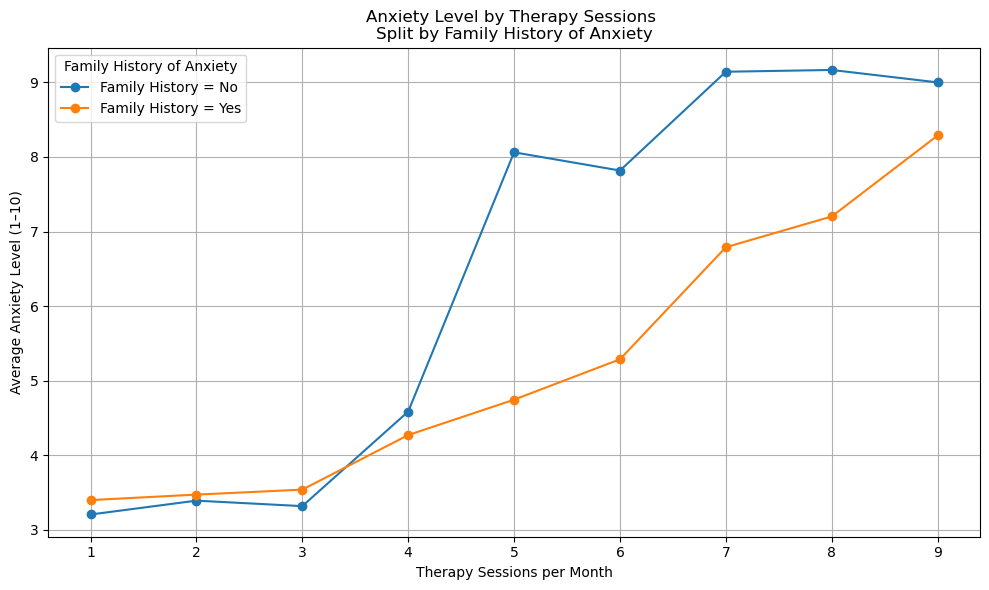

In [84]:
grouped = therapy_no_med.groupby(
    ['Therapy Sessions (per month)', 'Family History of Anxiety']
)['Anxiety Level (1-10)'].mean().reset_index()
pivoted = grouped.pivot(
    index='Therapy Sessions (per month)',
    columns='Family History of Anxiety',
    values='Anxiety Level (1-10)')
plt.figure(figsize=(10, 6))
for col in pivoted.columns:
    plt.plot(pivoted.index, pivoted[col], marker='o', label=f'Family History = {col}')
plt.title('Anxiety Level by Therapy Sessions \nSplit by Family History of Anxiety')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Average Anxiety Level (1‚Äì10)')
plt.legend(title='Family History of Anxiety')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### ◊ï◊õ◊ê◊ü ◊†◊ô◊™◊ü ◊ú◊ë◊ó◊ï◊ü ◊û◊ê◊§◊ô◊ô◊ü ◊†◊ï◊°◊£, ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô, ◊©◊¢◊ú◊ï◊ú ◊ú◊™◊®◊ï◊ù ◊ú◊î◊ë◊†◊î ◊¢◊û◊ï◊ß◊î ◊ô◊ï◊™◊® ◊©◊ú ◊ò◊ô◊§◊ï◊ú ◊ñ◊î

</div>


<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
<strong>◊î◊ô◊°◊ò◊ï◊®◊ô◊™ ◊ó◊®◊ì◊î ◊ë◊û◊©◊§◊ó◊î - ◊û◊õ◊©◊ô◊® ◊î◊°◊™◊í◊ú◊ï◊™?</strong><br>
◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ú◊ú◊ê ◊î◊ô◊°◊ò◊ï◊®◊ô◊™ ◊ó◊®◊ì◊î ◊ë◊û◊©◊§◊ó◊î ◊¢◊ú◊ï◊ú◊ô◊ù ◊ú◊î◊ô◊ï◊™ ◊§◊ó◊ï◊™ ◊û◊ï◊ì◊¢◊ô◊ù ◊ú◊û◊ï◊©◊í◊ô◊ù ◊©◊ú ◊ï◊ô◊°◊ï◊™ ◊®◊í◊©◊ô ◊ï◊ú◊î◊í◊ô◊ë ◊ë◊ó◊®◊ì◊î ◊û◊ï◊í◊ë◊®◊™.<br>
◊ú◊õ◊ü, ◊ó◊©◊ï◊ë ◊ú◊î◊¢◊†◊ô◊ß ◊ú◊î◊ù ◊î◊õ◊†◊î ◊û◊ï◊™◊ê◊û◊™ ◊ï◊ú◊ô◊ï◊ï◊ô ◊®◊í◊©◊ô ◊î◊ì◊ï◊ß ◊ë◊™◊ó◊ô◊ú◊™ ◊î◊ì◊®◊ö.
</div>


<div dir="rtl">
◊ú◊ê◊ó◊® ◊©◊ë◊ó◊†◊ï ◊õ◊ô◊¶◊ì ◊®◊û◊ï◊™ ◊î◊ó◊®◊ì◊î ◊û◊©◊™◊†◊ï◊™ ◊ú◊§◊ô ◊í◊ô◊ú ◊ï◊î◊ô◊°◊ò◊ï◊®◊ô◊î ◊û◊©◊§◊ó◊™◊ô◊™, 
</div>
<div dir="rtl">
◊†◊®◊¶◊î ◊õ◊¢◊™ ◊ú◊ë◊ì◊ï◊ß ◊î◊ê◊ù ◊í◊ù ◊î◊®◊í◊ú◊ô◊ù ◊ë◊®◊ô◊ê◊ï◊™◊ô◊ô◊ù ◊û◊©◊§◊ô◊¢◊ô◊ù ◊¢◊ú ◊®◊û◊ï◊™ ◊î◊ó◊®◊ì◊î ◊ë◊ß◊®◊ë ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ë◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô

</div>

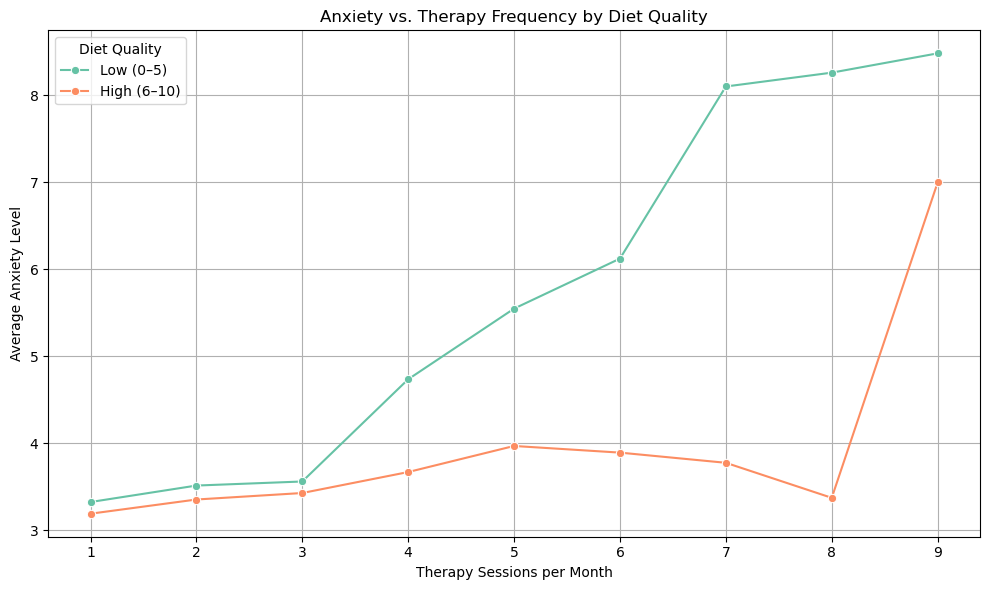

In [87]:
# Re-categorize diet quality into two bins: 0‚Äì5 and 5‚Äì10
therapy_only_participants["diet_quality_category"] = pd.cut(
    therapy_only_participants["Diet Quality (1-10)"],
    bins=[0, 5, 10],
    labels=["Low (0‚Äì5)", "High (6‚Äì10)"]
)

# Group data
line_data = therapy_only_participants.groupby(
    ["Therapy Sessions (per month)", "diet_quality_category"],
    observed=False
)["Anxiety Level (1-10)"].mean().reset_index()

# Filter for therapy sessions up to 9 per month
line_data_filtered = line_data[line_data["Therapy Sessions (per month)"] <= 9]

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=line_data_filtered,
    x="Therapy Sessions (per month)",
    y="Anxiety Level (1-10)",
    hue="diet_quality_category",
    palette="Set2",
    marker="o"
)

plt.xlabel("Therapy Sessions per Month")
plt.ylabel("Average Anxiety Level")
plt.title("Anxiety vs. Therapy Frequency by Diet Quality")
plt.legend(title="Diet Quality")
plt.grid(True)
plt.tight_layout()
plt.show()


<div dir="rtl">

### ◊ï◊©◊õ◊ë◊î ◊†◊ï◊°◊§◊™: 

</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
◊î◊í◊®◊£ ◊û◊¶◊ë◊ô◊¢ ◊¢◊ú ◊õ◊ö ◊©◊ß◊ë◊ï◊¶◊ï◊™ ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ë◊¢◊ú◊ô ◊™◊ñ◊ï◊†◊î ◊ê◊ô◊õ◊ï◊™◊ô◊™ ◊ô◊ï◊™◊® (6‚Äì10) ◊©◊ï◊û◊®◊ô◊ù ◊¢◊ú ◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊†◊û◊ï◊õ◊ï◊™ ◊ô◊ó◊°◊ô◊™ ◊í◊ù ◊ë◊ß◊®◊ë ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ê◊©◊® ◊§◊ï◊†◊ô◊ù ◊ú◊ô◊ï◊™◊® ◊ò◊ô◊§◊ï◊ú◊ô◊ù ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô◊ô◊ù, ◊ë◊¢◊ï◊ì ◊©◊ê◊¶◊ú ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ë◊¢◊ú◊ô ◊™◊ñ◊ï◊†◊î ◊ô◊®◊ï◊ì◊î ◊ô◊ï◊™◊® (0‚Äì5) ◊†◊ô◊õ◊®◊™ ◊ó◊®◊ì◊î ◊í◊ë◊ï◊î◊î ◊ô◊ï◊™◊® ◊õ◊û◊¢◊ò ◊ê◊¶◊ú ◊õ◊ú ◊ß◊ë◊ï◊¶◊ï◊™ ◊î◊û◊ò◊ï◊§◊ú◊ô◊ù. ◊û◊û◊¶◊ê ◊ñ◊î ◊û◊ó◊ñ◊ß ◊ê◊™ ◊î◊î◊ë◊†◊î ◊©◊ê◊ô◊õ◊ï◊™ ◊î◊™◊ñ◊ï◊†◊î ◊¢◊©◊ï◊ô◊î ◊ú◊î◊ô◊ï◊™ ◊ß◊©◊ï◊®◊î ◊ú◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊†◊û◊ï◊õ◊ï◊™ ◊ô◊ï◊™◊® ◊ë◊ß◊®◊ë ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ë◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô, ◊ë◊û◊ô◊ï◊ó◊ì ◊ë◊™◊ì◊ô◊®◊ï◊ô◊ï◊™ ◊ò◊ô◊§◊ï◊ú ◊í◊ë◊ï◊î◊ï◊™.
</div>


<div dir="rtl">

### ◊ê◊ñ ◊ú◊ê◊ó◊® ◊†◊ô◊™◊ï◊ó ◊û◊í◊ï◊ï◊ü ◊í◊ï◊®◊û◊ô◊ù ◊ó◊ô◊¶◊ï◊†◊ô◊ô◊ù ◊ï◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô◊ô◊ù ◊ë◊ß◊®◊ë ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ë◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô, ◊†◊ô◊™◊ü ◊ú◊ñ◊î◊ï◊™ ◊û◊°◊§◊® ◊™◊ï◊ë◊†◊ï◊™ ◊û◊®◊õ◊ñ◊ô◊ï◊™ ◊©◊û◊©◊ß◊§◊ï◊™ ◊õ◊ô◊¶◊ì ◊û◊©◊™◊†◊ô◊ù ◊ê◊ú◊ï ◊û◊™◊ß◊©◊®◊ô◊ù ◊ú◊®◊û◊ï◊™ ◊î◊ó◊®◊ì◊îüîçüßë‚Äç‚öïÔ∏è: 

</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
<div dir="rtl">
‚Ä¢ ◊î◊í◊ô◊ú ◊ê◊õ◊ü ◊û◊©◊§◊ô◊¢! ◊û◊¶◊ê◊†◊ï ◊©◊ß◊ë◊ï◊¶◊™ ◊î◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ë◊í◊ô◊ú◊ê◊ô 46‚Äì64 ◊î◊¢◊ô◊ì◊ï ◊¢◊ú ◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊†◊û◊ï◊õ◊ï◊™ ◊ô◊ï◊™◊® .
</div>
    
<div dir="rtl">
‚Ä¢ ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ú◊ú◊ê ◊î◊ô◊°◊ò◊ï◊®◊ô◊î ◊û◊©◊§◊ó◊™◊ô◊™ ◊©◊ú ◊ó◊®◊ì◊î ◊î◊¢◊ô◊ì◊ï ◊¢◊ú ◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊í◊ë◊ï◊î◊ï◊™ ◊ô◊ï◊™◊® ‚Äî ◊ô◊ô◊™◊õ◊ü ◊ë◊©◊ú ◊ó◊ï◊°◊® ◊ë◊ï◊ï◊ô◊°◊ï◊™ ◊®◊í◊©◊ô.
</div>

<div dir="rtl">
‚Ä¢ ◊ë◊™◊ó◊ï◊ù ◊ê◊ï◊®◊ó ◊î◊ó◊ô◊ô◊ù, ◊†◊û◊¶◊ê ◊ß◊©◊® ◊ë◊®◊ï◊® ◊ë◊ô◊ü ◊™◊ñ◊ï◊†◊î ◊ê◊ô◊õ◊ï◊™◊ô◊™ ◊ú◊ë◊ô◊ü ◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊†◊û◊ï◊õ◊ï◊™ .
</div>

<div dir="rtl">
◊ú◊°◊ô◊õ◊ï◊ù,  
◊î◊†◊™◊ï◊†◊ô◊ù ◊û◊¶◊ë◊ô◊¢◊ô◊ù ◊¢◊ú ◊û◊î ◊©◊î◊©◊ô◊ó ◊î◊ò◊ô◊§◊ï◊ú◊ô ◊ô◊ï◊ì◊¢ ◊õ◊ë◊® ◊û◊ñ◊û◊ü: ◊ú◊ê ◊û◊ì◊ï◊ë◊® ◊®◊ß ◊ë◊ó◊®◊ì◊î, ◊ê◊ú◊ê ◊ë◊û◊ô ◊©◊ó◊ï◊ï◊î ◊ê◊ï◊™◊î. ◊í◊ô◊ú, ◊™◊ñ◊ï◊†◊î, ◊ï◊î◊ô◊°◊ò◊ï◊®◊ô◊î ◊®◊í◊©◊ô◊™ ‚Äì ◊õ◊ï◊ú◊ù ◊û◊¶◊ò◊®◊§◊ô◊ù ◊ú◊™◊û◊ï◊†◊î ◊©◊û◊°◊ë◊ô◊®◊î ◊ú◊ê ◊®◊ß ◊õ◊û◊î ◊ó◊®◊ì◊î ◊ô◊©, ◊ê◊ú◊ê ◊ú◊û◊î ◊î◊ô◊ê ◊û◊™◊ë◊ò◊ê◊™ ◊õ◊§◊ô ◊©◊î◊ô◊ê. ◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊ê◊§◊ß◊ò◊ô◊ë◊ô ◊ê◊ô◊†◊ï ◊®◊ß ◊™◊í◊ï◊ë◊î ◊ú◊™◊°◊û◊ô◊ü, ◊ê◊ú◊ê ◊û◊¢◊†◊î ◊ú◊î◊ß◊©◊® ◊©◊ë◊ï ◊î◊ï◊ê ◊†◊ï◊¶◊®.
</div>
</div>
